In [2]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import datetime as dt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
#Wordcloud
import collections
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [129]:
df = pd.read_csv(r'C:\Users\kumari\Desktop\stock project\Data.csv',encoding= "ISO-8859-1")

In [131]:
df.head()

,News_Headlines,Date,Sensex 30 stock price,Nifty 50 stock price,GDP,INFLATION,CC,UnemploymentRate,SECTOR INDEX(IT),SECTOR INDEX(Banking),Sector Index(Pharma),Gold Price 10gms
0,Production outages in Asia lend slight support...,30-06-2017 15:03,30921.61,9520.90,7.2,2.49,96.97,5.42,10155.05,23137.25,9606.40,28465.00
1,UK consumers suffer longest decline in spendin...,30-06-2017 15:03,30919.72,9520.07,7.2,2.49,96.97,5.42,10153.94,23138.70,9603.08,28465.85
2,"Market Now: Gammon Infra, GVK Power Infra surg...",30-06-2017 15:01,30917.82,9519.24,7.2,2.49,96.97,5.42,10152.83,23140.15,9599.75,28466.69
3,Global markets: Brightening economy sets euro ...,30-06-2017 15:00,30915.93,9518.41,7.2,2.49,96.97,5.42,10151.73,23141.60,9596.43,28467.54
4,Relying on schemes like Swachh Bharat alone wo...,30-06-2017 14:59,30914.03,9517.57,7.2,2.49,96.97,5.42,10150.62,23143.05,9593.10,28468.38


In [4]:
all_headlines = ' '.join(df['News_Headlines'].str.lower())

In [5]:
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)

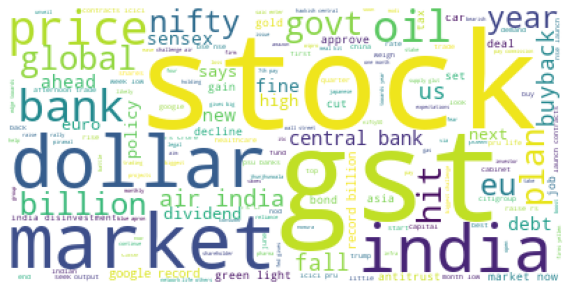

In [6]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

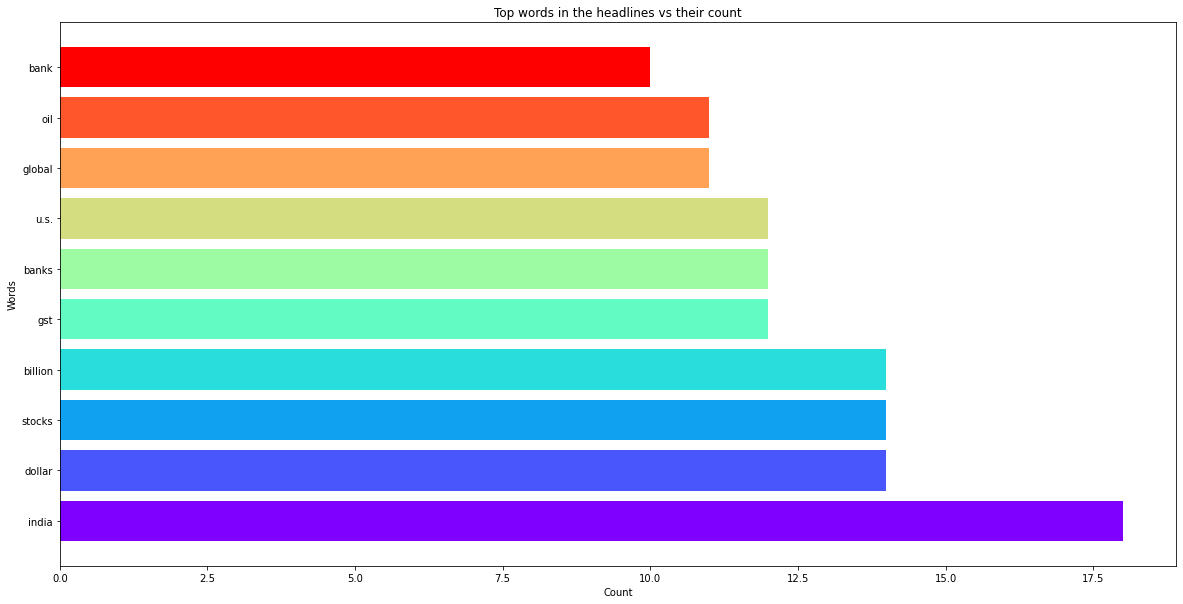

In [8]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [9]:
import string
string.punctuation
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

df["body_text_clean"] = df["News_Headlines"].apply(lambda x: remove_punc(x))

df.head()

,News_Headlines,Date,Sensex 30 stock price,Nifty 50 stock price,GDP,INFLATION,CC,UnemploymentRate,SECTOR INDEX(IT),SECTOR INDEX(Banking),Sector Index(Pharma),Gold Price 10gms,body_text_clean
0,Production outages in Asia lend slight support...,30-06-2017 15:03,30921.61,9520.90,7.2,2.49,96.97,5.42,10155.05,23137.25,9606.40,28465.00,Production outages in Asia lend slight support...
1,UK consumers suffer longest decline in spendin...,30-06-2017 15:03,30919.72,9520.07,7.2,2.49,96.97,5.42,10153.94,23138.70,9603.08,28465.85,UK consumers suffer longest decline in spendin...
2,"Market Now: Gammon Infra, GVK Power Infra surg...",30-06-2017 15:01,30917.82,9519.24,7.2,2.49,96.97,5.42,10152.83,23140.15,9599.75,28466.69,Market Now Gammon Infra GVK Power Infra surge ...
3,Global markets: Brightening economy sets euro ...,30-06-2017 15:00,30915.93,9518.41,7.2,2.49,96.97,5.42,10151.73,23141.60,9596.43,28467.54,Global markets Brightening economy sets euro u...
4,Relying on schemes like Swachh Bharat alone wo...,30-06-2017 14:59,30914.03,9517.57,7.2,2.49,96.97,5.42,10150.62,23143.05,9593.10,28468.38,Relying on schemes like Swachh Bharat alone wo...


In [10]:
import re


def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens

df["body_text_tokenized"] = df["body_text_clean"].apply(lambda x: tokenize(x))

df.head()

,News_Headlines,Date,Sensex 30 stock price,Nifty 50 stock price,GDP,INFLATION,CC,UnemploymentRate,SECTOR INDEX(IT),SECTOR INDEX(Banking),Sector Index(Pharma),Gold Price 10gms,body_text_clean,body_text_tokenized
0,Production outages in Asia lend slight support...,30-06-2017 15:03,30921.61,9520.90,7.2,2.49,96.97,5.42,10155.05,23137.25,9606.40,28465.00,Production outages in Asia lend slight support...,"[Production, outages, in, Asia, lend, slight, ..."
1,UK consumers suffer longest decline in spendin...,30-06-2017 15:03,30919.72,9520.07,7.2,2.49,96.97,5.42,10153.94,23138.70,9603.08,28465.85,UK consumers suffer longest decline in spendin...,"[UK, consumers, suffer, longest, decline, in, ..."
2,"Market Now: Gammon Infra, GVK Power Infra surg...",30-06-2017 15:01,30917.82,9519.24,7.2,2.49,96.97,5.42,10152.83,23140.15,9599.75,28466.69,Market Now Gammon Infra GVK Power Infra surge ...,"[Market, Now, Gammon, Infra, GVK, Power, Infra..."
3,Global markets: Brightening economy sets euro ...,30-06-2017 15:00,30915.93,9518.41,7.2,2.49,96.97,5.42,10151.73,23141.60,9596.43,28467.54,Global markets Brightening economy sets euro u...,"[Global, markets, Brightening, economy, sets, ..."
4,Relying on schemes like Swachh Bharat alone wo...,30-06-2017 14:59,30914.03,9517.57,7.2,2.49,96.97,5.42,10150.62,23143.05,9593.10,28468.38,Relying on schemes like Swachh Bharat alone wo...,"[Relying, on, schemes, like, Swachh, Bharat, a..."


In [11]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

df["body_text_stemmed"] = df["body_text_tokenized"].apply(lambda x: stemming(x))
df.head()

,News_Headlines,Date,Sensex 30 stock price,Nifty 50 stock price,GDP,INFLATION,CC,UnemploymentRate,SECTOR INDEX(IT),SECTOR INDEX(Banking),Sector Index(Pharma),Gold Price 10gms,body_text_clean,body_text_tokenized,body_text_stemmed
0,Production outages in Asia lend slight support...,30-06-2017 15:03,30921.61,9520.90,7.2,2.49,96.97,5.42,10155.05,23137.25,9606.40,28465.00,Production outages in Asia lend slight support...,"[Production, outages, in, Asia, lend, slight, ...","[product, outag, in, asia, lend, slight, suppo..."
1,UK consumers suffer longest decline in spendin...,30-06-2017 15:03,30919.72,9520.07,7.2,2.49,96.97,5.42,10153.94,23138.70,9603.08,28465.85,UK consumers suffer longest decline in spendin...,"[UK, consumers, suffer, longest, decline, in, ...","[UK, consum, suffer, longest, declin, in, spen..."
2,"Market Now: Gammon Infra, GVK Power Infra surg...",30-06-2017 15:01,30917.82,9519.24,7.2,2.49,96.97,5.42,10152.83,23140.15,9599.75,28466.69,Market Now Gammon Infra GVK Power Infra surge ...,"[Market, Now, Gammon, Infra, GVK, Power, Infra...","[market, now, gammon, infra, gvk, power, infra..."
3,Global markets: Brightening economy sets euro ...,30-06-2017 15:00,30915.93,9518.41,7.2,2.49,96.97,5.42,10151.73,23141.60,9596.43,28467.54,Global markets Brightening economy sets euro u...,"[Global, markets, Brightening, economy, sets, ...","[global, market, brighten, economi, set, euro,..."
4,Relying on schemes like Swachh Bharat alone wo...,30-06-2017 14:59,30914.03,9517.57,7.2,2.49,96.97,5.42,10150.62,23143.05,9593.10,28468.38,Relying on schemes like Swachh Bharat alone wo...,"[Relying, on, schemes, like, Swachh, Bharat, a...","[reli, on, scheme, like, swachh, bharat, alon,..."


In [12]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

df["body_text_lemmatized"] = df["body_text_stemmed"].apply(lambda x: lemmatizer(x))
df.head()

,News_Headlines,Date,Sensex 30 stock price,Nifty 50 stock price,GDP,INFLATION,CC,UnemploymentRate,SECTOR INDEX(IT),SECTOR INDEX(Banking),Sector Index(Pharma),Gold Price 10gms,body_text_clean,body_text_tokenized,body_text_stemmed,body_text_lemmatized
0,Production outages in Asia lend slight support...,30-06-2017 15:03,30921.61,9520.90,7.2,2.49,96.97,5.42,10155.05,23137.25,9606.40,28465.00,Production outages in Asia lend slight support...,"[Production, outages, in, Asia, lend, slight, ...","[product, outag, in, asia, lend, slight, suppo...","[product, outag, in, asia, lend, slight, suppo..."
1,UK consumers suffer longest decline in spendin...,30-06-2017 15:03,30919.72,9520.07,7.2,2.49,96.97,5.42,10153.94,23138.70,9603.08,28465.85,UK consumers suffer longest decline in spendin...,"[UK, consumers, suffer, longest, decline, in, ...","[UK, consum, suffer, longest, declin, in, spen...","[UK, consum, suffer, longest, declin, in, spen..."
2,"Market Now: Gammon Infra, GVK Power Infra surg...",30-06-2017 15:01,30917.82,9519.24,7.2,2.49,96.97,5.42,10152.83,23140.15,9599.75,28466.69,Market Now Gammon Infra GVK Power Infra surge ...,"[Market, Now, Gammon, Infra, GVK, Power, Infra...","[market, now, gammon, infra, gvk, power, infra...","[market, now, gammon, infra, gvk, power, infra..."
3,Global markets: Brightening economy sets euro ...,30-06-2017 15:00,30915.93,9518.41,7.2,2.49,96.97,5.42,10151.73,23141.60,9596.43,28467.54,Global markets Brightening economy sets euro u...,"[Global, markets, Brightening, economy, sets, ...","[global, market, brighten, economi, set, euro,...","[global, market, brighten, economi, set, euro,..."
4,Relying on schemes like Swachh Bharat alone wo...,30-06-2017 14:59,30914.03,9517.57,7.2,2.49,96.97,5.42,10150.62,23143.05,9593.10,28468.38,Relying on schemes like Swachh Bharat alone wo...,"[Relying, on, schemes, like, Swachh, Bharat, a...","[reli, on, scheme, like, swachh, bharat, alon,...","[reli, on, scheme, like, swachh, bharat, alon,..."


In [13]:
df.columns

Index(['News_Headlines', 'Date', 'Sensex 30 stock price',
       'Nifty 50 stock price', 'GDP', 'INFLATION', 'CC', 'UnemploymentRate',
       'SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)', 'Sector Index(Pharma)',
       'Gold Price 10gms', 'body_text_clean', 'body_text_tokenized',
       'body_text_stemmed', 'body_text_lemmatized'],
      dtype='object')

In [14]:
data = pd.read_csv(r'C:\Users\kumari\Desktop\stock project\Data.csv',encoding= "ISO-8859-1")

In [15]:
data.columns

Index(['News_Headlines', 'Date', 'Sensex 30 stock price',
       'Nifty 50 stock price', 'GDP', 'INFLATION', 'CC', 'UnemploymentRate',
       'SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)', 'Sector Index(Pharma)',
       'Gold Price 10gms'],
      dtype='object')

In [16]:
def cleaning( review, remove_stopwords=True):
    review_text = re.sub("[^a-zA-Z]"," ", review)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    b=[]
    stemmer = english_stemmer 
    for word in words:
        b.append(stemmer.stem(word))
    return(words)

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
clean_Text = []
for review in data['News_Headlines']:
    clean_Text.append( " ".join(cleaning(str(review))))

In [18]:
Top_Words_Review =pd.Series(' '.join(clean_Text).lower().split()).value_counts()[:10]
print ("Top Count Words Used In Review", Top_Words_Review)

Top Count Words Used In Review india      29
gst        19
stocks     18
dollar     16
billion    15
banks      14
oil        13
nifty      12
rs         12
u          12
dtype: int64


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(clean_Text)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [123]:
tfidf

{'afternoon': 4.850147601710058,
 'ahead': 4.380143972464323,
 'air': 4.157000421150114,
 'antitrust': 4.667826044916104,
 'approves': 4.850147601710058,
 'asia': 4.667826044916104,
 'bank': 4.061690241345788,
 'banks': 3.751535313041949,
 'best': 4.850147601710058,
 'big': 4.850147601710058,
 'biggest': 4.5136753650888455,
 'billion': 3.686996791904378,
 'blue': 4.850147601710058,
 'bse': 4.850147601710058,
 'buy': 4.850147601710058,
 'buyback': 4.5136753650888455,
 'cabinet': 4.850147601710058,
 'capital': 4.850147601710058,
 'case': 4.850147601710058,
 'central': 4.262360936807939,
 'china': 4.5136753650888455,
 'citigroup': 4.850147601710058,
 'contracts': 4.850147601710058,
 'could': 4.850147601710058,
 'cr': 4.667826044916104,
 'crore': 4.667826044916104,
 'debt': 4.380143972464323,
 'decline': 4.667826044916104,
 'demand': 4.850147601710058,
 'disinvestment': 4.667826044916104,
 'dollar': 3.6263721700879428,
 'eu': 4.157000421150114,
 'euro': 4.5136753650888455,
 'fall': 4.66782

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kumari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
clean_Text

['production outages asia lend slight support prices',
 'uk consumers suffer longest decline spending power since',
 'market gammon infra gvk power infra surge',
 'global markets brightening economy sets euro strongest quarter since debt crisis',
 'relying schemes like swachh bharat alone meet india social goals',
 'today india different jaitley beijing remember jibe',
 'new central bank harmony markets changing tune',
 'itc basf avanti feeds hit new high',
 'global equity listings third previous peaks',
 'markets remain rangebound afternoon trade nifty trades',
 'gst function naidu urges cong spoilsport',
 'investors slowly start push climate change agenda',
 'european shares set biggest monthly loss year',
 'global gold prices steady dollar falls hawkish central banks weigh',
 'good even gas comes purview gst abhishek somany somany ceramics',
 'nomura downgrades fortis healthcare neutral',
 'demonetisation little show far much collateral damage',
 'stocks rally first half',
 'gst lau

In [23]:
file = open('sentiment2.csv','w',encoding='ISO-8859-1')
file.write("Compound,Negative,Neutral,Positive\n")
#file.write("News_Headlines,Compound,Negative,Neutral,Positive\n")
Senti = SentimentIntensityAnalyzer()
sample_review = clean_Text
for sentence in sample_review:
    ss = Senti.polarity_scores(sentence)
    file.write(str(ss['compound'])+","+str(ss['neg'])+","+str(ss['neu'])+","+str(ss['pos'])+"\n")
    #file.write(sentence+","+str(ss['compound'])+","+str(ss['neg'])+","+str(ss['neu'])+","+str(ss['pos'])+"\n")
file.close()

In [24]:
pwd

'C:\\Users\\kumari\\Desktop\\stock project'

In [25]:
sentiment = pd.read_csv(r'C:\Users\kumari\Desktop\stock project\sentiment2.csv',encoding= "ISO-8859-1") 
macro_data = pd.read_csv(r'C:\Users\kumari\Desktop\stock project\Data.csv',encoding= "ISO-8859-1")

In [132]:
sentiment.head()

,Compound,Negative,Neutral,Positive
0,0.4019,0.000,0.690,0.31
1,-0.5423,0.333,0.667,0.00
2,0.0000,0.000,1.000,0.00
3,-0.0516,0.330,0.350,0.32
4,0.1280,0.160,0.640,0.20


# MODEL 1

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [27]:
full_data = pd.concat([macro_data, sentiment], axis=1)

In [121]:
full_data

,News_Headlines,Date,Sensex 30 stock price,Nifty 50 stock price,GDP,INFLATION,CC,UnemploymentRate,SECTOR INDEX(IT),SECTOR INDEX(Banking),Sector Index(Pharma),Gold Price 10gms,Compound,Negative,Neutral,Positive
0,Production outages in Asia lend slight support...,30-06-2017 15:03,30921.61,9520.90,7.2,2.49,96.97,5.42,10155.05,23137.25,9606.40,28465.00,0.4019,0.000,0.690,0.310
1,UK consumers suffer longest decline in spendin...,30-06-2017 15:03,30919.72,9520.07,7.2,2.49,96.97,5.42,10153.94,23138.70,9603.08,28465.85,-0.5423,0.333,0.667,0.000
2,"Market Now: Gammon Infra, GVK Power Infra surg...",30-06-2017 15:01,30917.82,9519.24,7.2,2.49,96.97,5.42,10152.83,23140.15,9599.75,28466.69,0.0000,0.000,1.000,0.000
3,Global markets: Brightening economy sets euro ...,30-06-2017 15:00,30915.93,9518.41,7.2,2.49,96.97,5.42,10151.73,23141.60,9596.43,28467.54,-0.0516,0.330,0.350,0.320
4,Relying on schemes like Swachh Bharat alone wo...,30-06-2017 14:59,30914.03,9517.57,7.2,2.49,96.97,5.42,10150.62,23143.05,9593.10,28468.38,0.1280,0.160,0.640,0.200
5,Today's India is different: Jaitley after Beij...,30-06-2017 14:53,30912.14,9516.74,7.2,2.49,96.97,5.42,10149.51,23144.50,9589.78,28469.23,0.0000,0.000,1.000,0.000
6,New central bank harmony has markets changing ...,30-06-2017 14:52,30910.24,9515.91,7.2,2.49,96.97,5.42,10148.40,23145.95,9586.45,28470.08,0.4019,0.000,0.690,0.310
7,"ITC, BASF, Avanti Feeds hit new high",30-06-2017 14:49,30908.35,9515.08,7.2,2.49,96.97,5.42,10147.30,23147.40,9583.13,28470.92,0.0000,0.000,1.000,0.000
8,"Global equity listings up by a third, but belo...",30-06-2017 14:48,30906.45,9514.25,7.2,2.49,96.97,5.42,10146.19,23148.85,9579.80,28471.77,0.0000,0.000,1.000,0.000
9,Markets remain rangebound in afternoon trade; ...,30-06-2017 14:38,30904.56,9513.42,7.2,2.49,96.97,5.42,10145.08,23150.30,9576.48,28472.62,0.4019,0.000,0.690,0.310


In [28]:
full_data.columns

Index(['News_Headlines', 'Date', 'Sensex 30 stock price',
       'Nifty 50 stock price', 'GDP', 'INFLATION', 'CC', 'UnemploymentRate',
       'SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)', 'Sector Index(Pharma)',
       'Gold Price 10gms', 'Compound', 'Negative', 'Neutral', 'Positive'],
      dtype='object')

In [29]:
x=full_data[['Sensex 30 stock price']]
y=full_data.drop(['News_Headlines', 'Date', 'Sensex 30 stock price','Nifty 50 stock price','SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)',
       'Sector Index(Pharma)'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(y,x,test_size=0.2,random_state=0)

In [30]:
regression=LinearRegression()
regression.fit(x_train,y_train)
print(pd.DataFrame({"index":x_train.columns,"coeff":regression.coef_.tolist()[0]}))
pd.DataFrame(data=regression.coef_,index=['coefficient'],columns=x_train.columns)
print("intercept:",regression.intercept_)
print('R^2 train dataset:',regression.score(x_train,y_train))
print('R^2 test dataset:',regression.score(x_test,y_test))

              index         coeff
0               GDP -5.314752e-15
1         INFLATION  1.368561e-10
2                CC -5.911716e-12
3  UnemploymentRate -2.273737e-13
4  Gold Price 10gms -8.359199e-01
5          Compound -1.448759e+02
6          Negative  7.872982e+03
7           Neutral  8.113660e+03
8          Positive  8.322537e+03
intercept: [46694.29565672]
R^2 train dataset: 0.11909620402526178
R^2 test dataset: 0.04884265581921843


In [31]:
x_include_constant=sm.add_constant(x_train)
model=sm.OLS(y_train,x_include_constant)
results=model.fit()
results.params
results.pvalues
print(pd.DataFrame({"Coeffiencients":results.params,"P-Values":round(results.pvalues,2)}))
results.summary()###SUMMARY OF REGRESSION

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                  Coeffiencients  P-Values
GDP                    35.424422      0.21
INFLATION              12.250946      0.21
CC                    477.098086      0.21
UnemploymentRate       26.666718      0.21
Gold Price 10gms       -0.835920      0.00
Compound             -144.875916      0.15
Negative             7872.982344      0.83
Neutral              8113.660198      0.83
Positive             8322.536902      0.82


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Sensex 30 stock price   R-squared:                       0.119
Model:                               OLS   Adj. R-squared:                  0.095
Method:                    Least Squares   F-statistic:                     4.894
Date:                   Thu, 29 Apr 2021   Prob (F-statistic):           0.000317
Time:                           16:42:31   Log-Likelihood:                -1125.1
No. Observations:                    187   AIC:                             2262.
Df Residuals:                        181   BIC:                             2282.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP                 35.4244     28.415      1.247      0.214     -20.643      91.492
INFLATION           12.2509      9.827      1.247      0.214      -7.139      31.641
CC                 477.0981    382.697      1.247      0.214    -278.023    1232.220
UnemploymentRate    26.6667     21.390      1.247      0.214     -15.540      68.873
Gold Price 10gms    -0.8359      0.183     -4.565      0.000      -1.197      -0.475
Compound          -144.8759     99.435     -1.457      0.147    -341.077      51.325
Negative          7872.9823   3.76e+04      0.210      0.834   -6.62e+04     8.2e+04
Neutral           8113.6602   3.76e+04      0.216      0.829    -6.6e+04    8.22e+04
Positive          8322.5369   3.75e+04      0.222      0.825   -6.57e+04    8.24e+04
==============================================================================
Omnibus:                       60.135   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.188
Skew:                           0.269   Prob(JB):                      0.00226
Kurtosis:                       1.871   Cond. No.                     1.14e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
x_include_constant

,GDP,INFLATION,CC,UnemploymentRate,Gold Price 10gms,Compound,Negative,Neutral,Positive
75,7.2,2.49,96.97,5.42,28554.52,0.0000,0.000,1.000,0.000
33,7.2,2.49,96.97,5.42,28492.92,0.0000,0.000,1.000,0.000
123,7.2,2.49,96.97,5.42,28584.29,0.0000,0.000,1.000,0.000
63,7.2,2.49,96.97,5.42,28530.77,0.0000,0.000,1.000,0.000
209,7.2,2.49,96.97,5.42,28498.43,0.0000,0.000,1.000,0.000
154,7.2,2.49,96.97,5.42,28556.70,0.6369,0.000,0.417,0.583
124,7.2,2.49,96.97,5.42,28583.43,0.0000,0.000,1.000,0.000
196,7.2,2.49,96.97,5.42,28512.20,0.0000,0.000,1.000,0.000
173,7.2,2.49,96.97,5.42,28536.57,0.3612,0.000,0.737,0.263
16,7.2,2.49,96.97,5.42,28478.54,-0.4939,0.348,0.652,0.000


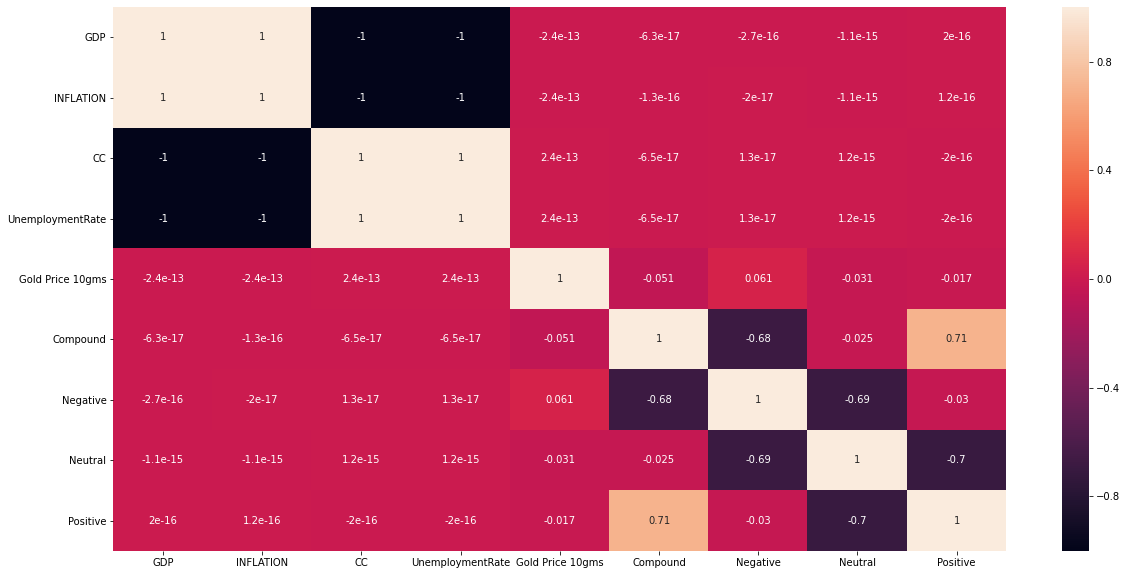

In [33]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = x_include_constant.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [34]:
###VARIANCE INFLATION FACTOR:CHECKING FOR MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=[]
for i in range(0, len(x_include_constant.columns)):
        VIF.append(variance_inflation_factor(exog=x_include_constant.values,exog_idx=i))
print(VIF)
print(pd.DataFrame({"coeffients":x_include_constant.columns,"VIF":np.around(VIF,3)}))

[6.067197073556167e-05, 2.8269822286335257e-06, 0.0, 0.0, 1.0119423325557508, 16.46858217919688, 559105.3298478381, 1103785.580670408, 578918.2097518297]
         coeffients          VIF
0               GDP        0.000
1         INFLATION        0.000
2                CC        0.000
3  UnemploymentRate        0.000
4  Gold Price 10gms        1.012
5          Compound       16.469
6          Negative   559105.330
7           Neutral  1103785.581
8          Positive   578918.210


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


# MODEL 2

In [35]:
x2=full_data[['Sensex 30 stock price']]
y2=full_data.drop(['News_Headlines', 'Date', 'Sensex 30 stock price','Nifty 50 stock price','SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)',
       'Sector Index(Pharma)','Neutral','Compound'],axis=1)
x_train2,x_test2,y_train2,y_test2=train_test_split(y2,x2,test_size=0.2,random_state=0)

In [36]:
regression2=LinearRegression()
regression2.fit(x_train2,y_train2)
print(pd.DataFrame({"index":x_train2.columns,"coeff":regression2.coef_.tolist()[0]}))
pd.DataFrame(data=regression2.coef_,index=['coefficient'],columns=x_train2.columns)
print("intercept:",regression2.intercept_)
print('R^2 train dataset:',regression2.score(x_train2,y_train2))
print('R^2 test dataset:',regression2.score(x_test2,y_test2))

              index         coeff
0               GDP  2.538052e-15
1         INFLATION  3.835919e-15
2                CC -1.421085e-14
3  UnemploymentRate  0.000000e+00
4  Gold Price 10gms -8.343300e-01
5          Negative -4.108743e+01
6          Positive  9.873377e+00
intercept: [54761.7059017]
R^2 train dataset: 0.10810772454136397
R^2 test dataset: 0.11129458600429332


In [37]:
x_include_constant2=sm.add_constant(x_train2)
model=sm.OLS(y_train2,x_include_constant2)
results2=model.fit()
results2.params
results2.pvalues
print(pd.DataFrame({"Coeffiencients":results2.params,"P-Values":round(results2.pvalues,2)}))
results2.summary()###SUMMARY OF REGRESSION

                  Coeffiencients  P-Values
GDP                    41.544727      0.00
INFLATION              14.367552      0.00
CC                    559.526698      0.00
UnemploymentRate       31.273948      0.00
Gold Price 10gms       -0.834330      0.00
Negative              -41.087425      0.42
Positive                9.873377      0.84


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Sensex 30 stock price   R-squared:                       0.108
Model:                               OLS   Adj. R-squared:                  0.093
Method:                    Least Squares   F-statistic:                     7.394
Date:                   Thu, 29 Apr 2021   Prob (F-statistic):           0.000106
Time:                           16:43:02   Log-Likelihood:                -1126.2
No. Observations:                    187   AIC:                             2260.
Df Residuals:                        183   BIC:                             2273.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP                 41.5447      3.951     10.516      0.000      33.750      49.339
INFLATION           14.3676      1.366     10.516      0.000      11.672      17.063
CC                 559.5267     53.207     10.516      0.000     454.548     664.505
UnemploymentRate    31.2739      2.974     10.516      0.000      25.406      37.142
Gold Price 10gms    -0.8343      0.183     -4.571      0.000      -1.194      -0.474
Negative           -41.0874     50.379     -0.816      0.416    -140.485      58.310
Positive             9.8734     49.396      0.200      0.842     -87.585     107.332
==============================================================================
Omnibus:                       59.783   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.259
Skew:                           0.275   Prob(JB):                      0.00218
Kurtosis:                       1.872   Cond. No.                     9.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
x_include_constant2

,GDP,INFLATION,CC,UnemploymentRate,Gold Price 10gms,Negative,Positive
75,7.2,2.49,96.97,5.42,28554.52,0.000,0.000
33,7.2,2.49,96.97,5.42,28492.92,0.000,0.000
123,7.2,2.49,96.97,5.42,28584.29,0.000,0.000
63,7.2,2.49,96.97,5.42,28530.77,0.000,0.000
209,7.2,2.49,96.97,5.42,28498.43,0.000,0.000
154,7.2,2.49,96.97,5.42,28556.70,0.000,0.583
124,7.2,2.49,96.97,5.42,28583.43,0.000,0.000
196,7.2,2.49,96.97,5.42,28512.20,0.000,0.000
173,7.2,2.49,96.97,5.42,28536.57,0.000,0.263
16,7.2,2.49,96.97,5.42,28478.54,0.348,0.000


In [39]:
###VARIANCE INFLATION FACTOR:CHECKING FOR MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF2=[]
for i in range(0, len(x_include_constant2.columns)):
        VIF2.append(variance_inflation_factor(exog=x_include_constant2.values,exog_idx=i))
print(VIF2)
print(pd.DataFrame({"coeffients":x_include_constant2.columns,"VIF":np.around(VIF2,3)}))

[4.4974062952838777e-05, 1.0950265023496443e-05, 0.0, 0.0, 1.0039611519963834, 1.0045720193816816, 1.001145296486527]
         coeffients    VIF
0               GDP  0.000
1         INFLATION  0.000
2                CC  0.000
3  UnemploymentRate  0.000
4  Gold Price 10gms  1.004
5          Negative  1.005
6          Positive  1.001


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


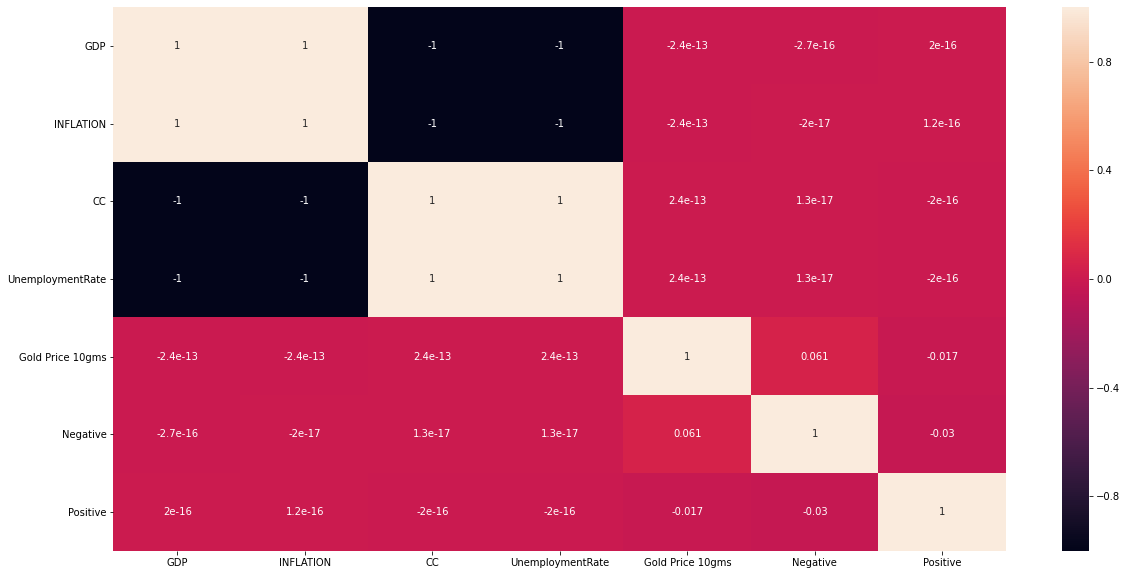

In [40]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = x_include_constant2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [207]:
y2

,GDP,INFLATION,CC,UnemploymentRate,Gold Price 10gms,Negative,Positive
0,7.2,2.49,96.97,5.42,28465.00,0.000,0.310
1,7.2,2.49,96.97,5.42,28465.85,0.333,0.000
2,7.2,2.49,96.97,5.42,28466.69,0.000,0.000
3,7.2,2.49,96.97,5.42,28467.54,0.330,0.320
4,7.2,2.49,96.97,5.42,28468.38,0.160,0.200
5,7.2,2.49,96.97,5.42,28469.23,0.000,0.000
6,7.2,2.49,96.97,5.42,28470.08,0.000,0.310
7,7.2,2.49,96.97,5.42,28470.92,0.000,0.000
8,7.2,2.49,96.97,5.42,28471.77,0.000,0.000
9,7.2,2.49,96.97,5.42,28472.62,0.000,0.310


In [41]:
a=regression2.predict(y2)

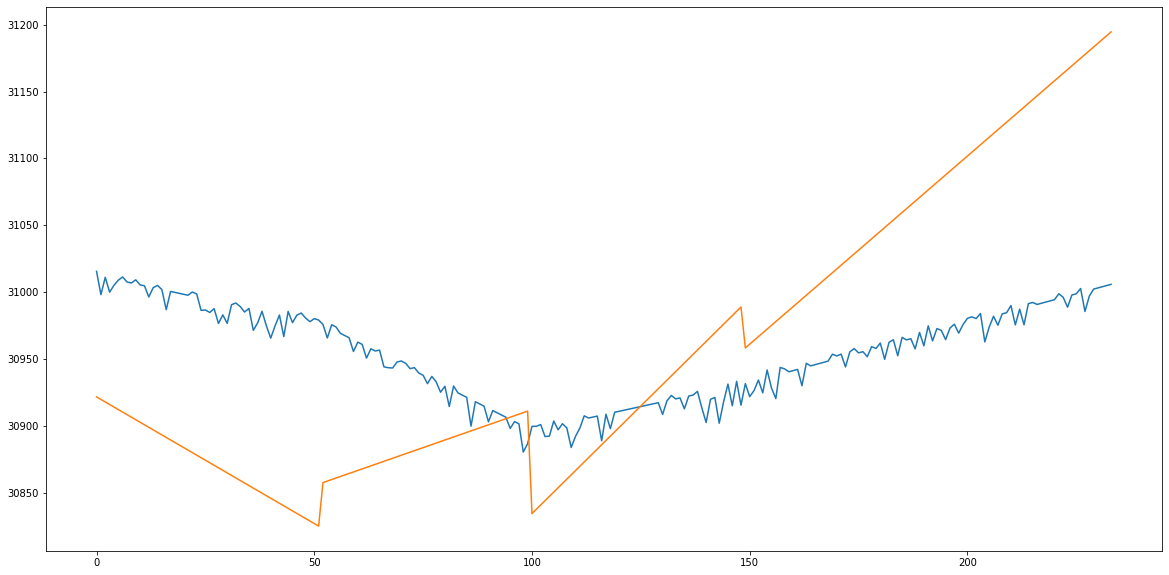

In [42]:
a=regression2.predict(y2)
predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
plt.plot(predict)
plt.plot(x2)

In [43]:
predict

,PREDICTED VALUE
0,31015.562248
1,30998.110208
2,31011.091483
3,30999.982933
4,31005.082153
5,31008.972285
6,31011.323851
7,31007.562267
8,31006.853087
9,31009.204653


In [44]:
x_include_constant2=sm.add_constant(x_train2)
model2=sm.OLS(y_train2,x_include_constant2)
results2=model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


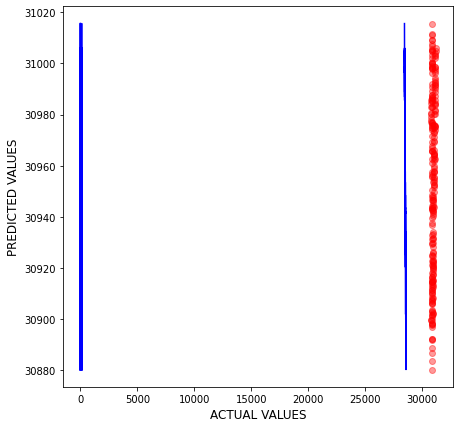

In [46]:
##SCATTER PLOT
plt.figure(figsize=(7,7))
plt.scatter(x=x2,y=predict,color="red",alpha=0.4)
plt.plot(y2,predict["PREDICTED VALUE"],color="blue")
plt.xlabel("ACTUAL VALUES",fontsize=12)
plt.ylabel("PREDICTED VALUES",fontsize=12)
plt.show()

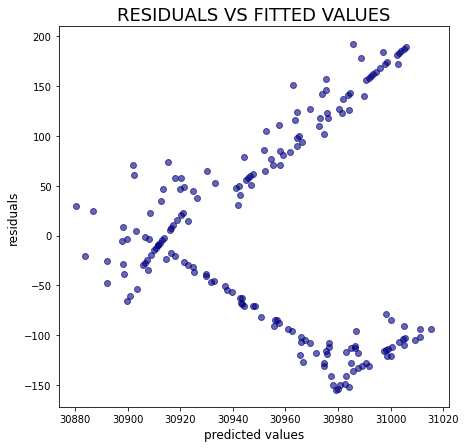

In [47]:
##RESIDUAL VS PREDICTED VALUES
plt.figure(figsize=(7,7))
plt.scatter(x=results2.fittedvalues,y=results2.resid,color="navy",alpha=0.6)
plt.xlabel("predicted values",fontsize=12)
plt.ylabel("residuals",fontsize=12)
plt.title("RESIDUALS VS FITTED VALUES",fontsize=18 )
plt.show()

Text(0.5, 1.0, 'RESIDUAL DISTRIBUTION')

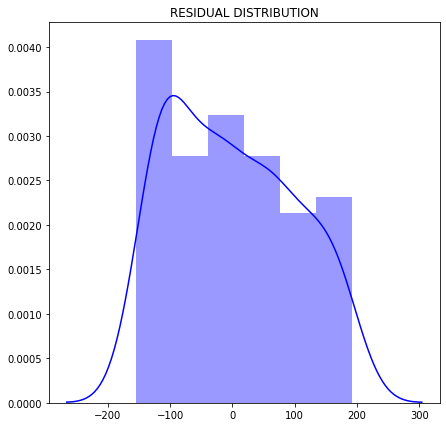

In [136]:
####DISTRIBUTION OF RESIDUALS
residual_mean=round(results2.resid.mean(),3)
residual_skew=round(results2.resid.skew(),3)
plt.figure(figsize=(7,7))
sns.distplot(results2.resid,color="blue")
plt.title("RESIDUAL DISTRIBUTION")

In [137]:
####MEAN SQUARED ERROR
results2.mse_resid


10187.139272102651

In [138]:
results2.rsquared

0.10810772454136042

In [50]:
###PREDICTING AND RANGE
##ROOT MEAN SQUARE ERROR
#RMSE2=np.sqrt(results2.mse_resid)

#pd.DataFrame({"R-Squared":[results2.rsquared],"Mean Square Error":[results2.mse_resid],"Root Mean Square":np.sqrt(results2.mse_resid)},index=["value"])

#print("one standard deviation:",np.sqrt(results2.mse_resid))

one standard deviation: 100.93135921061725


In [51]:
RMSE2

100.93135921061725

In [125]:
def predict_price(dataset):
    a=regression2.predict(dataset)
    upper=a+1*RMSE2
    lower=a-1*RMSE2
    predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
    upper=pd.DataFrame.from_records(upper,columns=["UPPER VALUE"])
    lower=pd.DataFrame.from_records(lower,columns=["LOWER VALUE"])
    frames=[predict,upper,lower]
    df=pd.concat(frames,axis=1)
    print(df)
    plt.plot(df)
    plt.legend(loc='best')
    plt.show(block=False)
    return df

No handles with labels found to put in legend.


     PREDICTED VALUE   UPPER VALUE   LOWER VALUE
0       31015.562248  31116.493607  30914.630889
1       30998.110208  31099.041567  30897.178849
2       31011.091483  31112.022842  30910.160124
3       30999.982933  31100.914292  30899.051574
4       31005.082153  31106.013512  30904.150794
5       31008.972285  31109.903644  30908.040926
6       31011.323851  31112.255211  30910.392492
7       31007.562267  31108.493626  30906.630908
8       31006.853087  31107.784446  30905.921727
9       31009.204653  31110.136012  30908.273294
10      31005.443069  31106.374428  30904.511710
11      31004.733888  31105.665248  30903.802529
12      30996.380518  31097.311877  30895.449158
13      31003.323871  31104.255230  30902.392511
14      31005.023794  31105.955153  30904.092435
15      31001.913853  31102.845212  30900.982494
16      30986.906248  31087.837608  30885.974889
17      31000.503835  31101.435194  30899.572476
18      30999.794655  31100.726014  30898.863295
19      30999.085474

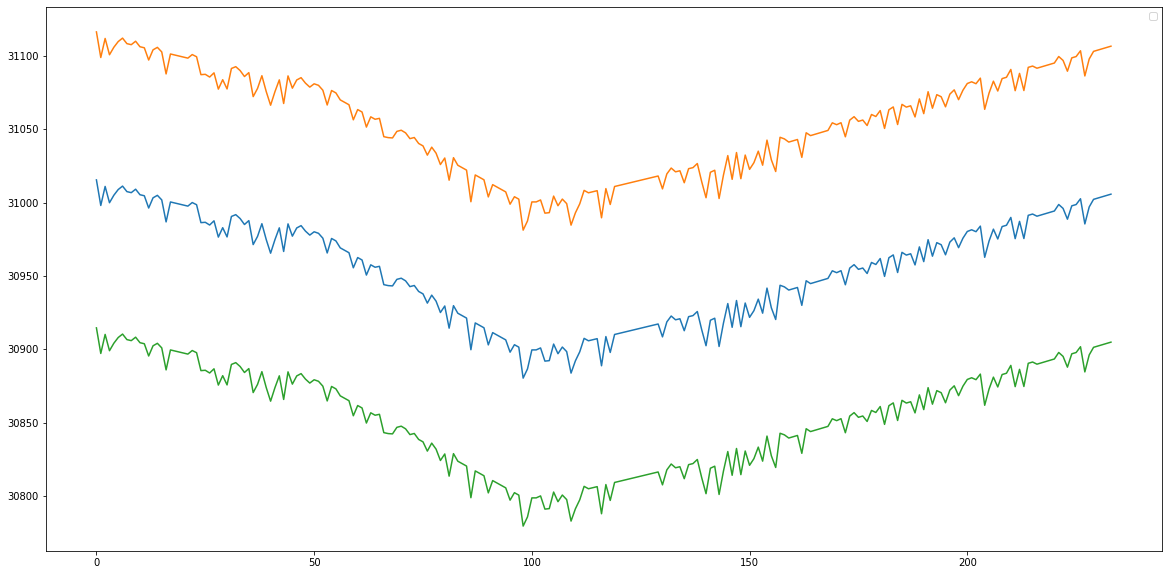

Text(0.5, 1.0, 'Sensex 30')

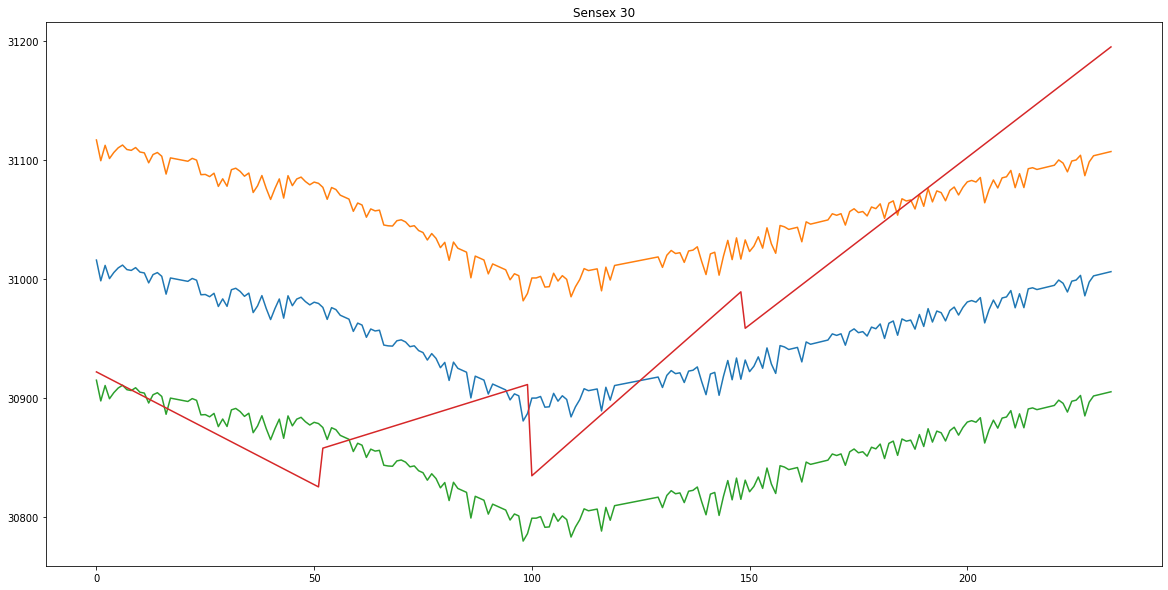

In [126]:
b2=predict_price(y2)

plt.figure(figsize=(20,10))
plt.plot(b2)
plt.plot(x2)
plt.title("Sensex 30")

# MODEL 3

In [54]:
x3=full_data[['Nifty 50 stock price']]
y3=full_data.drop(['News_Headlines', 'Date', 'Sensex 30 stock price','Nifty 50 stock price','SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)',
       'Sector Index(Pharma)','Neutral','Compound'],axis=1)
x_train3,x_test3,y_train3,y_test3=train_test_split(y3,x3,test_size=0.2,random_state=0)

In [55]:
regression3=LinearRegression()
regression3.fit(x_train3,y_train3)
print(pd.DataFrame({"index":x_train3.columns,"coeff":regression3.coef_.tolist()[0]}))
pd.DataFrame(data=regression3.coef_,index=['coefficient'],columns=x_train3.columns)
print("intercept:",regression3.intercept_)
print('R^2 train dataset:',regression3.score(x_train3,y_train3))
print('R^2 test dataset:',regression3.score(x_test3,y_test3))

              index         coeff
0               GDP  8.664972e-16
1         INFLATION  6.472962e-15
2                CC -3.552714e-15
3  UnemploymentRate -1.776357e-15
4  Gold Price 10gms -2.394686e-01
5          Negative -1.686221e+01
6          Positive -6.791172e+00
intercept: [16357.37386268]
R^2 train dataset: 0.12412553158894403
R^2 test dataset: 0.16999938573234175


In [56]:
x_include_constant3=sm.add_constant(x_train3)
model=sm.OLS(y_train3,x_include_constant3)
results3=model.fit()
results3.params
results3.pvalues
print(pd.DataFrame({"Coeffiencients":results3.params,"P-Values":round(results3.pvalues,2)}))
results3.summary()###SUMMARY OF REGRESSION

                  Coeffiencients  P-Values
GDP                    12.409450      0.00
INFLATION               4.291601      0.00
CC                    167.131159      0.00
UnemploymentRate        9.341558      0.00
Gold Price 10gms       -0.239469      0.00
Negative              -16.862212      0.22
Positive               -6.791172      0.61


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Nifty 50 stock price   R-squared:                       0.124
Model:                              OLS   Adj. R-squared:                  0.110
Method:                   Least Squares   F-statistic:                     8.645
Date:                  Thu, 29 Apr 2021   Prob (F-statistic):           2.14e-05
Time:                          16:44:13   Log-Likelihood:                -882.04
No. Observations:                   187   AIC:                             1772.
Df Residuals:                       183   BIC:                             1785.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP                 12.4094      1.070     11.592      0.000      10.297      14.522
INFLATION            4.2916      0.370     11.592      0.000       3.561       5.022
CC                 167.1312     14.417     11.592      0.000     138.685     195.577
UnemploymentRate     9.3416      0.806     11.592      0.000       7.752      10.931
Gold Price 10gms    -0.2395      0.049     -4.842      0.000      -0.337      -0.142
Negative           -16.8622     13.651     -1.235      0.218     -43.796      10.071
Positive            -6.7912     13.385     -0.507      0.612     -33.199      19.617
==============================================================================
Omnibus:                        8.199   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.165
Skew:                           0.246   Prob(JB):                       0.0756
Kurtosis:                       2.351   Cond. No.                     9.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
###VARIANCE INFLATION FACTOR:CHECKING FOR MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF3=[]
for i in range(0, len(x_include_constant3.columns)):
        VIF3.append(variance_inflation_factor(exog=x_include_constant3.values,exog_idx=i))
print(VIF3)
print(pd.DataFrame({"coeffients":x_include_constant3.columns,"VIF":np.around(VIF3,3)}))

[4.4974062952838777e-05, 1.0950265023496443e-05, 0.0, 0.0, 1.0039611519963834, 1.0045720193816816, 1.001145296486527]
         coeffients    VIF
0               GDP  0.000
1         INFLATION  0.000
2                CC  0.000
3  UnemploymentRate  0.000
4  Gold Price 10gms  1.004
5          Negative  1.005
6          Positive  1.001


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [58]:
a=regression3.predict(y3)

In [59]:
a

array([[9538.79540577],
       [9535.08200434],
       [9540.49596722],
       [9532.554714  ],
       [9536.03507703],
       [9539.88771702],
       [9537.57890537],
       [9539.48301512],
       [9539.27946682],
       [9536.97065517],
       [9538.87476492],
       [9538.67121662],
       [9532.81385586],
       [9538.26651472],
       [9536.40592043],
       [9537.86181282],
       [9531.79021486],
       [9537.45711091],
       [9537.25356262],
       [9537.05001432],
       [9536.84886071],
       [9536.64531242],
       [9534.28217139],
       [9534.61752038],
       [9532.27678901],
       [9532.46346627],
       [9530.07400681],
       [9533.05124017],
       [9528.58394701],
       [9531.29756134],
       [9526.00556741],
       [9534.61940821],
       [9533.08479018],
       [9534.21470631],
       [9529.20091818],
       [9533.80760972],
       [9527.18195346],
       [9527.84455431],
       [9533.20175421],
       [9526.02886892],
       [9525.1223513 ],
       [9525.757

In [60]:
x_include_constant3=sm.add_constant(x_train3)
model3=sm.OLS(y_train3,x_include_constant3)
results3=model3.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


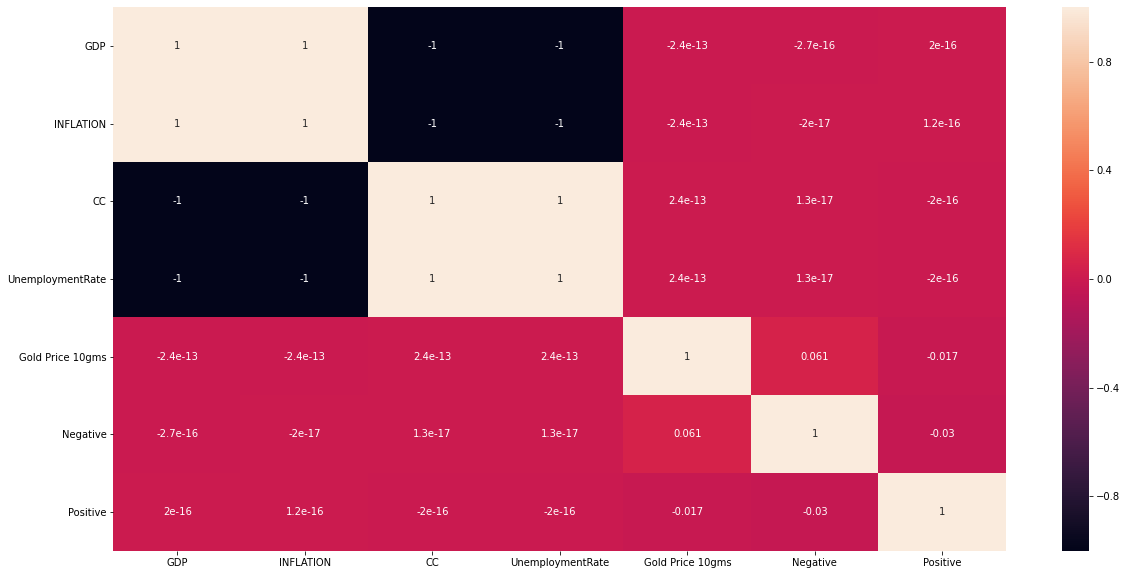

In [61]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = x_include_constant3.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

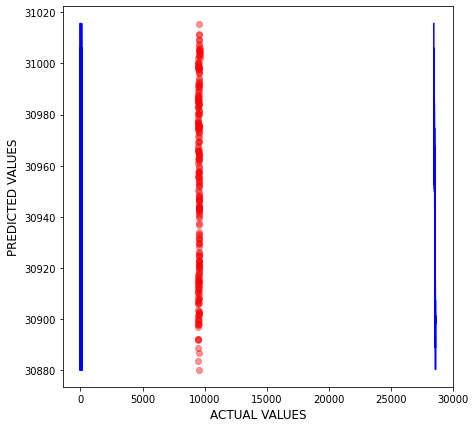

In [63]:
##SCATTER PLOT
plt.figure(figsize=(7,7))
plt.scatter(x=x3,y=predict,color="red",alpha=0.4)
plt.plot(y3,predict["PREDICTED VALUE"],color="blue")
plt.xlabel("ACTUAL VALUES",fontsize=12)
plt.ylabel("PREDICTED VALUES",fontsize=12)
plt.show()

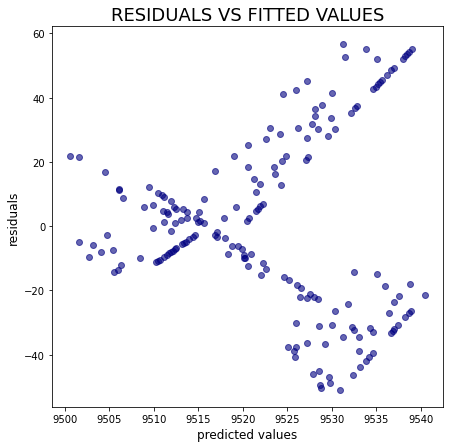

In [64]:
##RESIDUAL VS PREDICTED VALUES
plt.figure(figsize=(7,7))
plt.scatter(x=results3.fittedvalues,y=results3.resid,color="navy",alpha=0.6)
plt.xlabel("predicted values",fontsize=12)
plt.ylabel("residuals",fontsize=12)
plt.title("RESIDUALS VS FITTED VALUES",fontsize=18 )
plt.show()

Text(0.5, 1.0, 'RESIDUAL DISTRIBUTION')

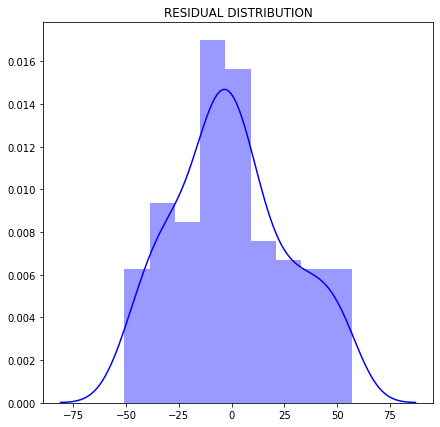

In [133]:
####DISTRIBUTION OF RESIDUALS
residual_mean=round(results3.resid.mean(),3)
residual_skew=round(results3.resid.skew(),3)
plt.figure(figsize=(7,7))
sns.distplot(results3.resid,color="blue")
plt.title("RESIDUAL DISTRIBUTION")

In [66]:
####MEAN SQUARED ERROR
results3.mse_resid
results3.rsquared

0.12412553158893658

In [67]:
###PREDICTING AND RANGE
##ROOT MEAN SQUARE ERROR
RMSE3=np.sqrt(results3.mse_resid)

#pd.DataFrame({"R-Squared":[results2.rsquared],"Mean Square Error":[results2.mse_resid],"Root Mean Square":np.sqrt(results2.mse_resid)},index=["value"])

print("one standard deviation:",np.sqrt(results3.mse_resid))

one standard deviation: 27.349149142724308


In [68]:
def predict_price(dataset):
    a=regression3.predict(dataset)
    upper=a+1*RMSE2
    lower=a-1*RMSE2
    predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
    upper=pd.DataFrame.from_records(upper,columns=["UPPER VALUE"])
    lower=pd.DataFrame.from_records(lower,columns=["LOWER VALUE"])
    frames=[predict,upper,lower]
    df=pd.concat(frames,axis=1)
    print(df)
    plt.plot(df)
    plt.legend(loc='best')
    plt.show(block=False)
    return df

No handles with labels found to put in legend.


     PREDICTED VALUE  UPPER VALUE  LOWER VALUE
0        9538.795406  9639.726765  9437.864047
1        9535.082004  9636.013364  9434.150645
2        9540.495967  9641.427326  9439.564608
3        9532.554714  9633.486073  9431.623355
4        9536.035077  9636.966436  9435.103718
5        9539.887717  9640.819076  9438.956358
6        9537.578905  9638.510265  9436.647546
7        9539.483015  9640.414374  9438.551656
8        9539.279467  9640.210826  9438.348108
9        9536.970655  9637.902014  9436.039296
10       9538.874765  9639.806124  9437.943406
11       9538.671217  9639.602576  9437.739857
12       9532.813856  9633.745215  9431.882497
13       9538.266515  9639.197874  9437.335156
14       9536.405920  9637.337280  9435.474561
15       9537.861813  9638.793172  9436.930454
16       9531.790215  9632.721574  9430.858856
17       9537.457111  9638.388470  9436.525752
18       9537.253563  9638.184922  9436.322203
19       9537.050014  9637.981374  9436.118655
20       9536

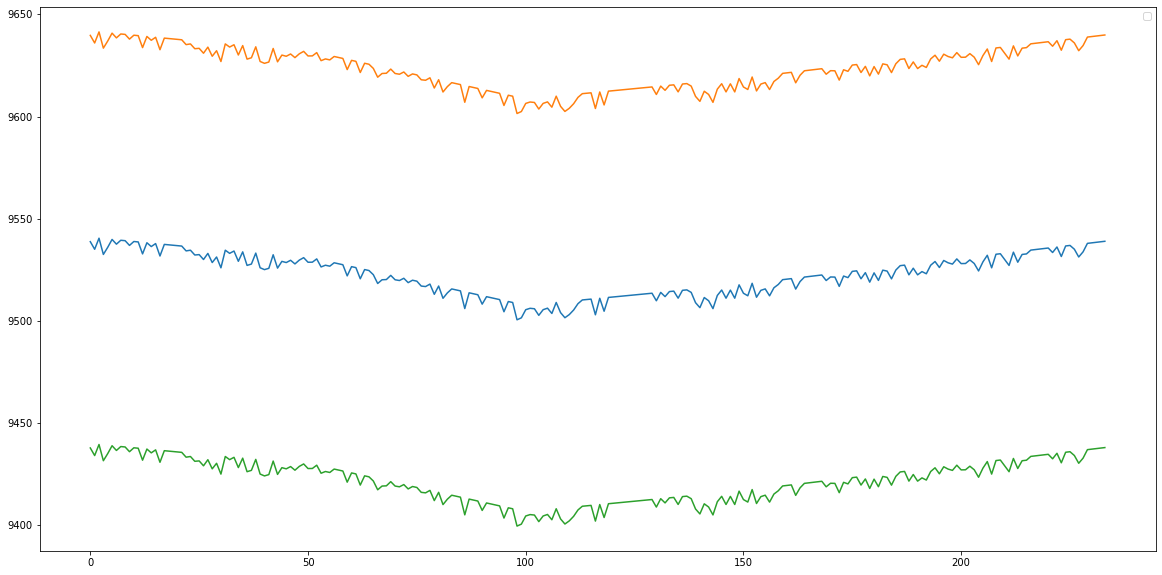

Text(0.5, 1.0, 'Nifty 50')

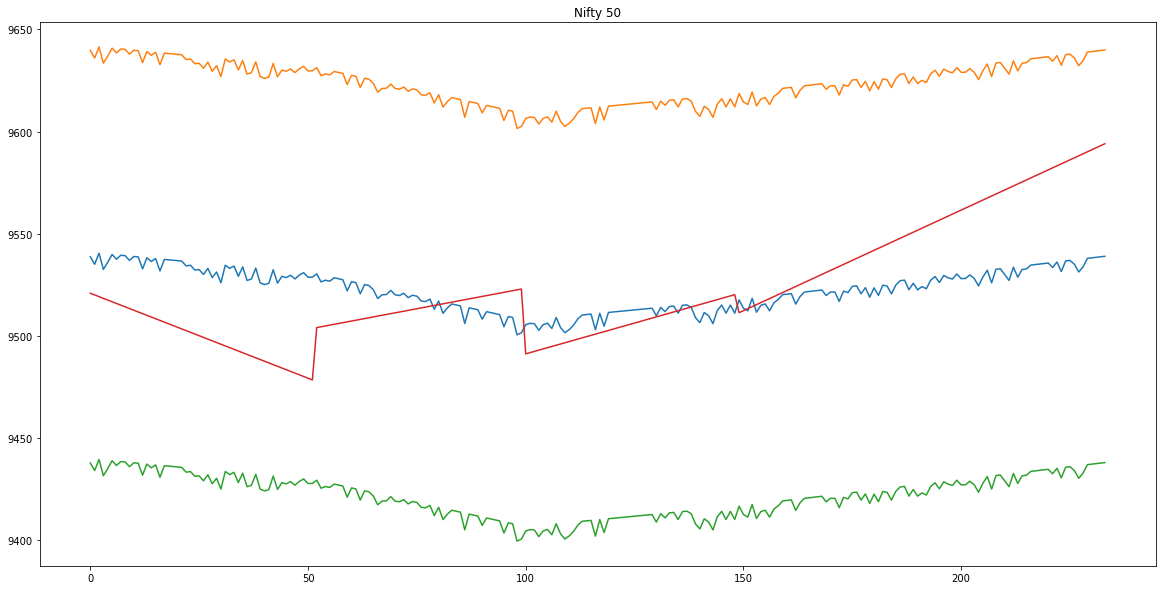

In [69]:
b2=predict_price(y3)

plt.figure(figsize=(20,10))
plt.plot(b2)
plt.plot(x3)
plt.title("Nifty 50")

In [75]:
x4=full_data[['SECTOR INDEX(IT)']]
y4=full_data.drop(['News_Headlines', 'Date', 'Sensex 30 stock price','Nifty 50 stock price','SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)',
       'Sector Index(Pharma)','Neutral','Compound'],axis=1)
x_train4,x_test4,y_train4,y_test4=train_test_split(y4,x4,test_size=0.2,random_state=0)

In [76]:
regression4=LinearRegression()
regression4.fit(x_train4,y_train4)
print(pd.DataFrame({"index":x_train4.columns,"coeff":regression4.coef_.tolist()[0]}))
pd.DataFrame(data=regression4.coef_,index=['coefficient'],columns=x_train4.columns)
print("intercept:",regression4.intercept_)
print('R^2 train dataset:',regression4.score(x_train4,y_train4))
print('R^2 test dataset:',regression4.score(x_test4,y_test4))

              index         coeff
0               GDP  9.739690e-17
1         INFLATION  1.396947e-14
2                CC -1.221245e-15
3  UnemploymentRate -3.552714e-15
4  Gold Price 10gms -3.553058e-02
5          Negative -1.197735e+01
6          Positive -3.690347e+01
intercept: [11146.20654837]
R^2 train dataset: 0.06079107716126042
R^2 test dataset: -0.029230495279620294


In [77]:
x_include_constant4=sm.add_constant(x_train4)
model=sm.OLS(y_train4,x_include_constant4)
results4=model.fit()
results4.params
results4.pvalues
print(pd.DataFrame({"Coeffiencients":results4.params,"P-Values":round(results4.pvalues,2)}))
results4.summary()###SUMMARY OF REGRESSION

                  Coeffiencients  P-Values
GDP                     8.456021      0.00
INFLATION               2.924374      0.00
CC                    113.886155      0.00
UnemploymentRate        6.365504      0.00
Gold Price 10gms       -0.035531      0.40
Negative              -11.977352      0.31
Positive              -36.903467      0.00


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SECTOR INDEX(IT)   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.948
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00927
Time:                        16:46:59   Log-Likelihood:                -853.88
No. Observations:                 187   AIC:                             1716.
Df Residuals:                     183   BIC:                             1729.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP                  8.4560      0.921      9.183      0.000       6.639      10.273
INFLATION            2.9244      0.318      9.183      0.000       2.296       3.553
CC                 113.8862     12.402      9.183      0.000      89.417     138.355
UnemploymentRate     6.3655      0.693      9.183      0.000       4.998       7.733
Gold Price 10gms    -0.0355      0.043     -0.835      0.405      -0.119       0.048
Negative           -11.9774     11.743     -1.020      0.309     -35.146      11.191
Positive           -36.9035     11.514     -3.205      0.002     -59.620     -14.187
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.769
Skew:                           0.136   Prob(JB):                        0.681
Kurtosis:                       2.843   Cond. No.                     9.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
###VARIANCE INFLATION FACTOR:CHECKING FOR MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF4=[]
for i in range(0, len(x_include_constant4.columns)):
        VIF4.append(variance_inflation_factor(exog=x_include_constant4.values,exog_idx=i))
print(VIF4)
print(pd.DataFrame({"coeffients":x_include_constant4.columns,"VIF":np.around(VIF4,3)}))

[4.4974062952838777e-05, 1.0950265023496443e-05, 0.0, 0.0, 1.0039611519963834, 1.0045720193816816, 1.001145296486527]
         coeffients    VIF
0               GDP  0.000
1         INFLATION  0.000
2                CC  0.000
3  UnemploymentRate  0.000
4  Gold Price 10gms  1.004
5          Negative  1.005
6          Positive  1.001


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [79]:
a=regression4.predict(y4)

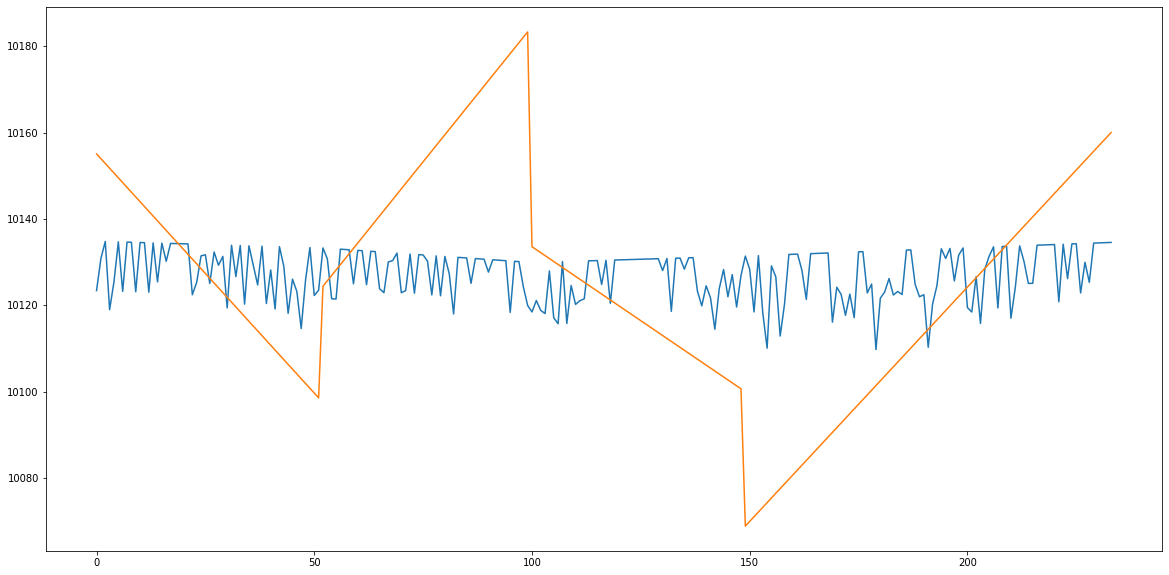

In [80]:
a=regression4.predict(y4)
predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
plt.plot(predict)
plt.plot(x4)

In [81]:
x_include_constant4=sm.add_constant(x_train4)
model4=sm.OLS(y_train4,x_include_constant4)
results4=model4.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


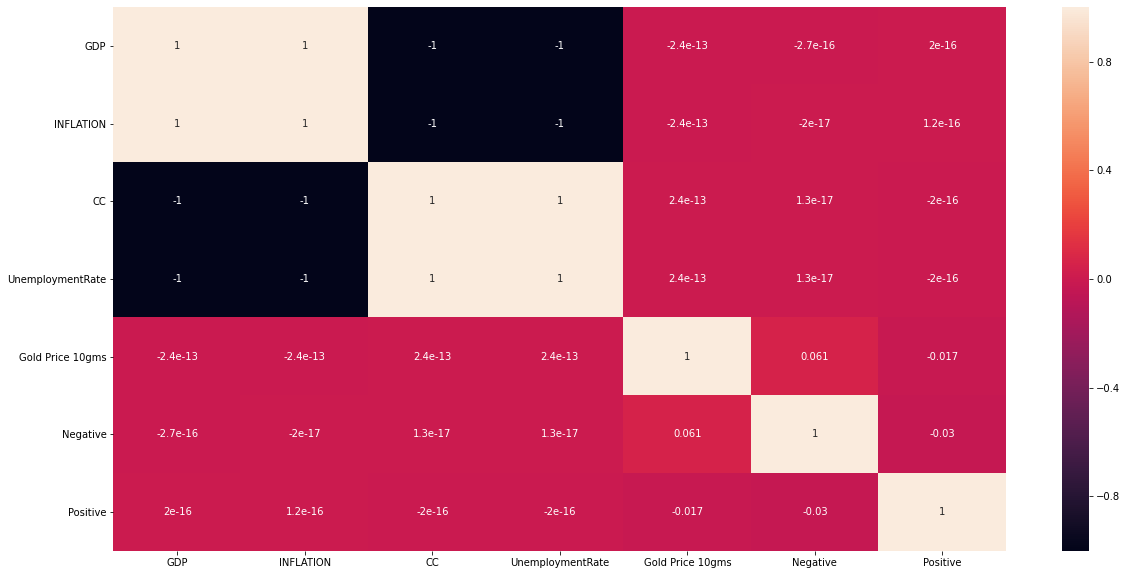

In [82]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = x_include_constant4.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

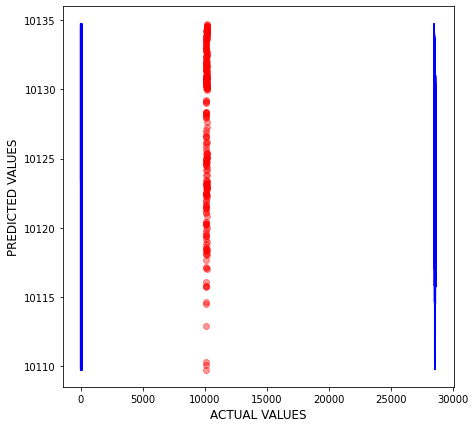

In [83]:
##SCATTER PLOT
plt.figure(figsize=(7,7))
plt.scatter(x=x4,y=predict,color="red",alpha=0.4)
plt.plot(y4,predict["PREDICTED VALUE"],color="blue")
plt.xlabel("ACTUAL VALUES",fontsize=12)
plt.ylabel("PREDICTED VALUES",fontsize=12)
plt.show()

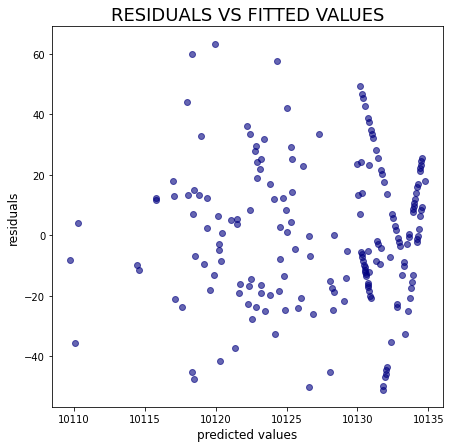

In [84]:
##RESIDUAL VS PREDICTED VALUES
plt.figure(figsize=(7,7))
plt.scatter(x=results4.fittedvalues,y=results4.resid,color="navy",alpha=0.6)
plt.xlabel("predicted values",fontsize=12)
plt.ylabel("residuals",fontsize=12)
plt.title("RESIDUALS VS FITTED VALUES",fontsize=18 )
plt.show()

Text(0.5, 1.0, 'RESIDUAL DISTRIBUTION')

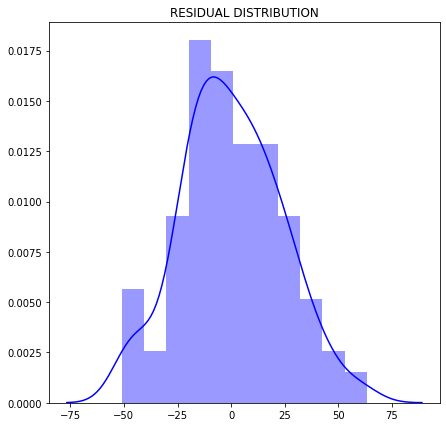

In [134]:
####DISTRIBUTION OF RESIDUALS
residual_mean=round(results4.resid.mean(),3)
residual_skew=round(results4.resid.skew(),3)
plt.figure(figsize=(7,7))
sns.distplot(results4.resid,color="blue")
plt.title("RESIDUAL DISTRIBUTION")

In [86]:
####MEAN SQUARED ERROR
results4.mse_resid
results4.rsquared

0.06079107716126797

In [87]:
###PREDICTING AND RANGE
##ROOT MEAN SQUARE ERROR
RMSE4=np.sqrt(results4.mse_resid)

#pd.DataFrame({"R-Squared":[results2.rsquared],"Mean Square Error":[results2.mse_resid],"Root Mean Square":np.sqrt(results2.mse_resid)},index=["value"])

print("one standard deviation:",np.sqrt(results4.mse_resid))

one standard deviation: 23.525831049210463


In [88]:
def predict_price(dataset):
    a=regression4.predict(dataset)
    upper=a+1*RMSE2
    lower=a-1*RMSE2
    predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
    upper=pd.DataFrame.from_records(upper,columns=["UPPER VALUE"])
    lower=pd.DataFrame.from_records(lower,columns=["LOWER VALUE"])
    frames=[predict,upper,lower]
    df=pd.concat(frames,axis=1)
    print(df)
    plt.plot(df)
    plt.legend(loc='best')
    plt.show(block=False)
    return df

No handles with labels found to put in legend.


     PREDICTED VALUE   UPPER VALUE   LOWER VALUE
0       10123.388559  10224.319919  10022.457200
1       10130.809975  10231.741334  10029.878616
2       10134.768587  10235.699947  10033.837228
3       10118.976751  10219.908110  10018.045392
4       10125.411471  10226.342830  10024.480112
5       10134.678340  10235.609699  10033.746981
6       10123.208064  10224.139423  10022.276705
7       10134.618293  10235.549652  10033.686934
8       10134.588092  10235.519451  10033.656733
9       10123.117816  10224.049176  10022.186457
10      10134.528045  10235.459405  10033.596686
11      10134.497844  10235.429204  10033.566485
12      10123.007875  10223.939234  10022.076516
13      10134.437798  10235.369157  10033.506439
14      10125.403151  10226.334510  10024.471792
15      10134.377751  10235.309110  10033.446392
16      10130.179432  10231.110791  10029.248072
17      10134.317704  10235.249064  10033.386345
18      10134.287503  10235.218863  10033.356144
19      10134.257302

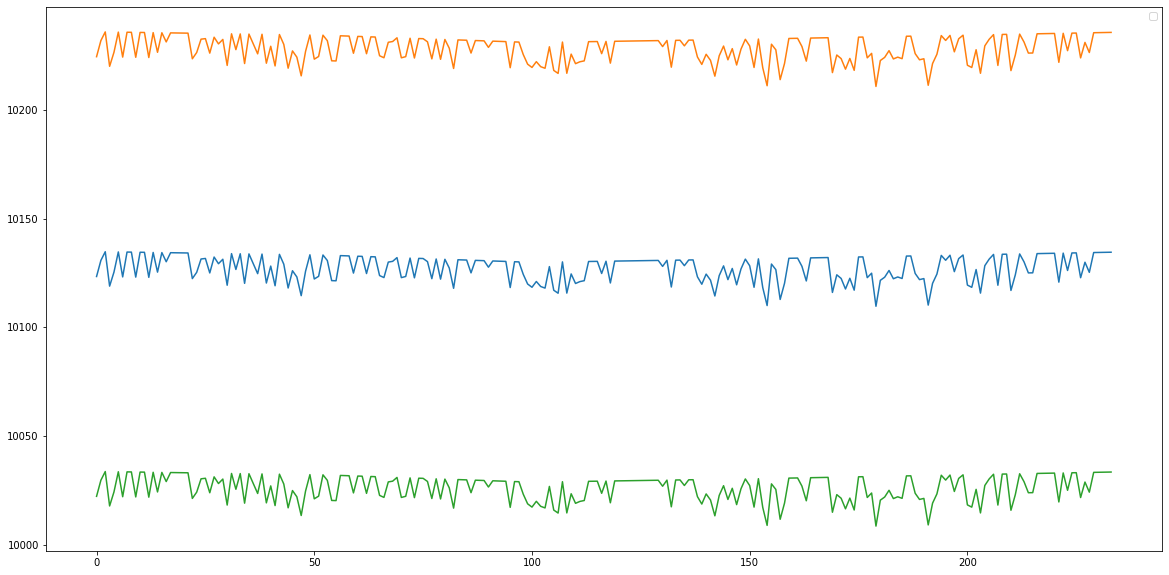

Text(0.5, 1.0, 'Sector(IT)')

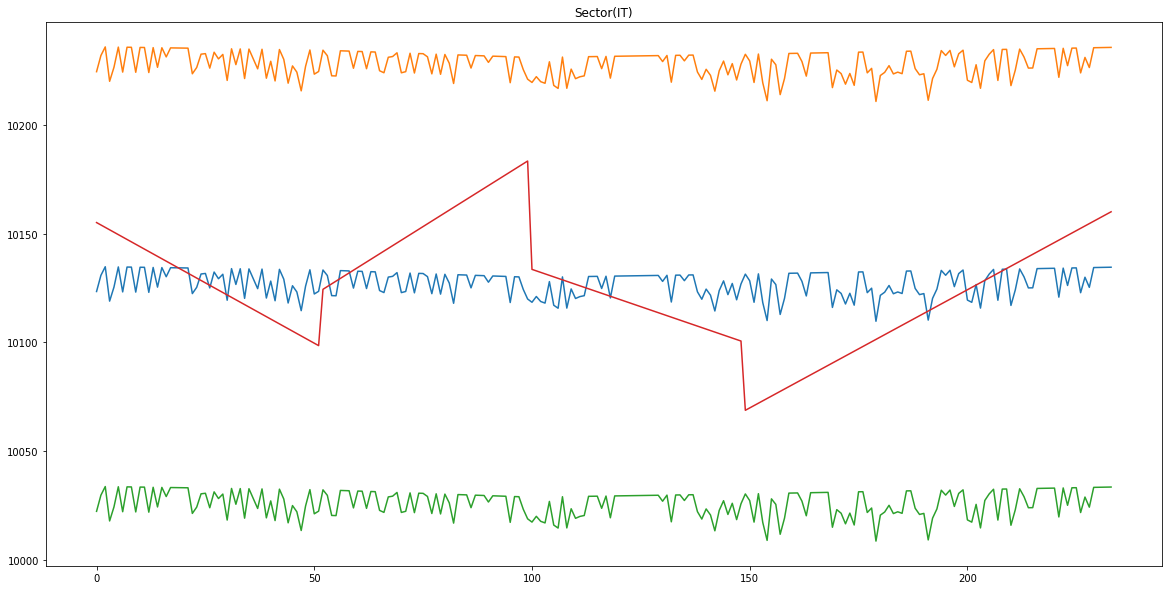

In [89]:
b2=predict_price(y4)

plt.figure(figsize=(20,10))
plt.plot(b2)
plt.plot(x4)
plt.title("Sector(IT)")

# MODEL 5

In [90]:
x5=full_data[['SECTOR INDEX(Banking)']]
y5=full_data.drop(['News_Headlines','Date', 'Sensex 30 stock price','Nifty 50 stock price','SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)',
       'Sector Index(Pharma)','Neutral','Compound'],axis=1)
x_train5,x_test5,y_train5,y_test5=train_test_split(y5,x5,test_size=0.2,random_state=0)

In [91]:
regression5=LinearRegression()
regression5.fit(x_train5,y_train5)
print(pd.DataFrame({"index":x_train5.columns,"coeff":regression5.coef_.tolist()[0]}))
pd.DataFrame(data=regression5.coef_,index=['coefficient'],columns=x_train5.columns)
print("intercept:",regression5.intercept_)
print('R^2 train dataset:',regression5.score(x_train5,y_train5))
print('R^2 test dataset:',regression5.score(x_test5,y_test5))

              index         coeff
0               GDP  5.585040e-15
1         INFLATION  3.316178e-14
2                CC -2.842171e-14
3  UnemploymentRate -7.105427e-15
4  Gold Price 10gms -7.983537e-01
5          Negative -1.037529e+02
6          Positive -2.609042e+01
intercept: [46087.29241289]
R^2 train dataset: 0.0784744970827621
R^2 test dataset: 0.030071735252447884


In [92]:
x_include_constant5=sm.add_constant(x_train5)
model=sm.OLS(y_train5,x_include_constant5)
results5=model.fit()
results5.params
results5.pvalues
print(pd.DataFrame({"Coeffiencients":results5.params,"P-Values":round(results5.pvalues,2)}))
results5.summary()###SUMMARY OF REGRESSION

                  Coeffiencients  P-Values
GDP                    34.963922      0.00
INFLATION              12.091690      0.00
CC                    470.896041      0.00
UnemploymentRate       26.320063      0.00
Gold Price 10gms       -0.798354      0.00
Negative             -103.752922      0.10
Positive              -26.090420      0.68


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     SECTOR INDEX(Banking)   R-squared:                       0.078
Model:                               OLS   Adj. R-squared:                  0.063
Method:                    Least Squares   F-statistic:                     5.195
Date:                   Thu, 29 Apr 2021   Prob (F-statistic):            0.00182
Time:                           16:47:28   Log-Likelihood:                -1169.3
No. Observations:                    187   AIC:                             2347.
Df Residuals:                        183   BIC:                             2360.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP                 34.9639      4.974      7.029      0.000      25.150      44.778
INFLATION           12.0917      1.720      7.029      0.000       8.698      15.486
CC                 470.8960     66.989      7.029      0.000     338.726     603.066
UnemploymentRate    26.3201      3.744      7.029      0.000      18.933      33.708
Gold Price 10gms    -0.7984      0.230     -3.474      0.001      -1.252      -0.345
Negative          -103.7529     63.428     -1.636      0.104    -228.897      21.391
Positive           -26.0904     62.190     -0.420      0.675    -148.793      96.612
==============================================================================
Omnibus:                        9.154   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.427
Skew:                           0.520   Prob(JB):                      0.00897
Kurtosis:                       2.641   Cond. No.                     9.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

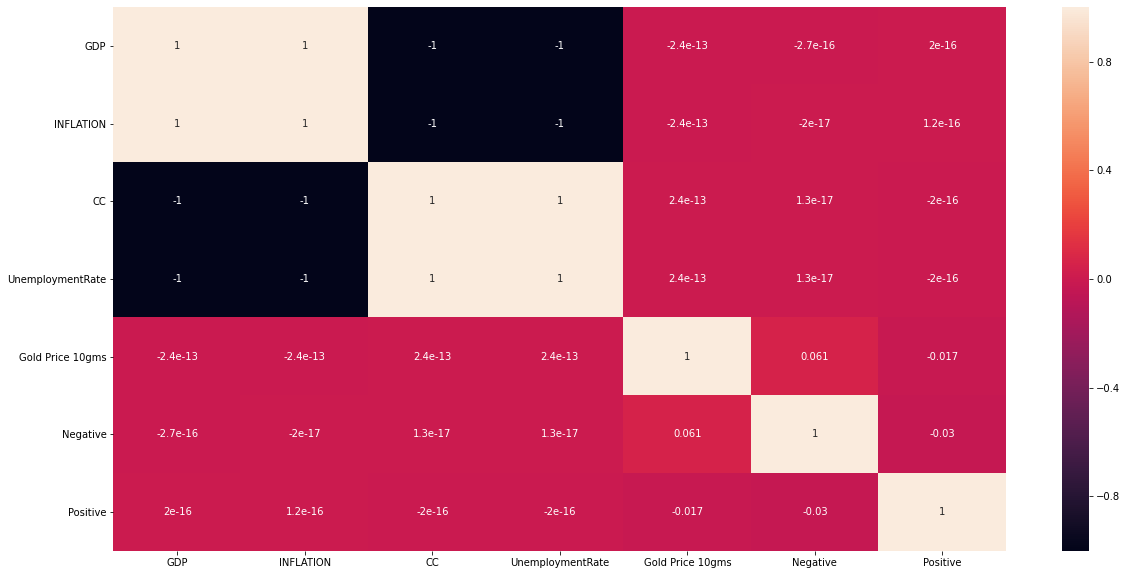

In [93]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = x_include_constant5.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [94]:
###VARIANCE INFLATION FACTOR:CHECKING FOR MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF5=[]
for i in range(0, len(x_include_constant5.columns)):
        VIF5.append(variance_inflation_factor(exog=x_include_constant5.values,exog_idx=i))
print(VIF5)
print(pd.DataFrame({"coeffients":x_include_constant5.columns,"VIF":np.around(VIF5,3)}))

[4.4974062952838777e-05, 1.0950265023496443e-05, 0.0, 0.0, 1.0039611519963834, 1.0045720193816816, 1.001145296486527]
         coeffients    VIF
0               GDP  0.000
1         INFLATION  0.000
2                CC  0.000
3  UnemploymentRate  0.000
4  Gold Price 10gms  1.004
5          Negative  1.005
6          Positive  1.001


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [95]:
a=regression5.predict(y5)

In [96]:
a

array([[23354.06511735],
       [23326.92482394],
       [23360.80392973],
       [23317.53793048],
       [23337.63616043],
       [23358.77611122],
       [23350.00948034],
       [23357.4268934 ],
       [23356.74829272],
       [23347.98166183],
       [23355.39907489],
       [23354.72047421],
       [23322.88867258],
       [23353.37125639],
       [23346.32659323],
       [23352.02203857],
       [23315.23742113],
       [23350.67282074],
       [23349.99422006],
       [23349.31561938],
       [23348.64500224],
       [23347.96640156],
       [23338.99104731],
       [23340.38157335],
       [23322.80168151],
       [23324.51738157],
       [23312.86880169],
       [23329.28160259],
       [23302.36149625],
       [23319.63215103],
       [23291.68712702],
       [23341.2123289 ],
       [23335.4200059 ],
       [23339.86311107],
       [23314.54697604],
       [23338.50590971],
       [23298.3054294 ],
       [23305.43612836],
       [23336.48607475],
       [23296.99040248],


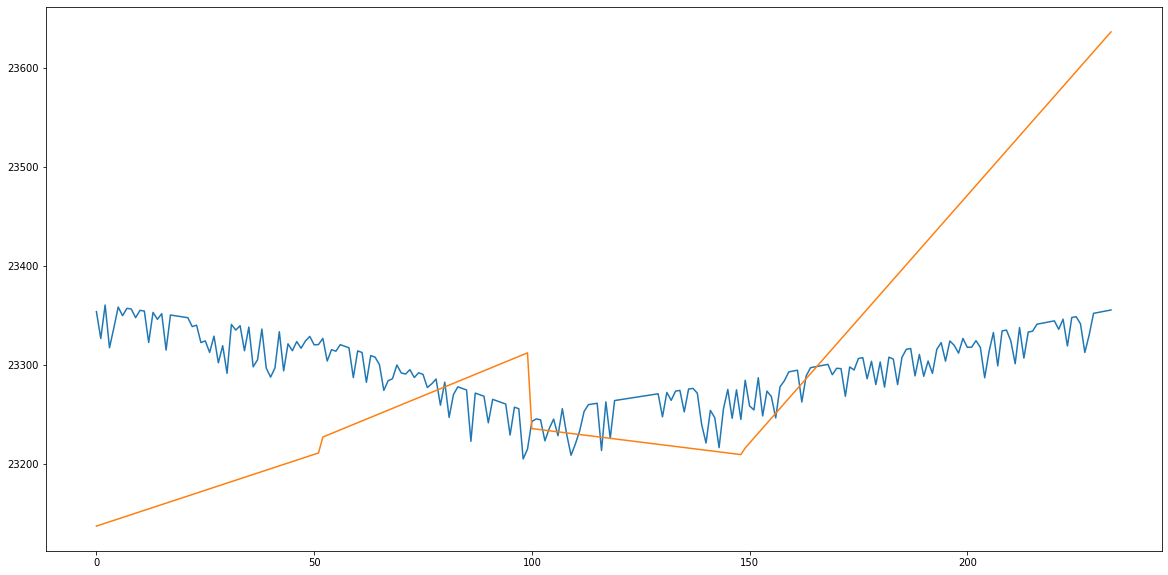

In [97]:
a=regression5.predict(y5)
predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
plt.plot(predict)
plt.plot(x5)

In [98]:
x_include_constant5=sm.add_constant(x_train5)
model5=sm.OLS(y_train5,x_include_constant5)
results5=model5.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


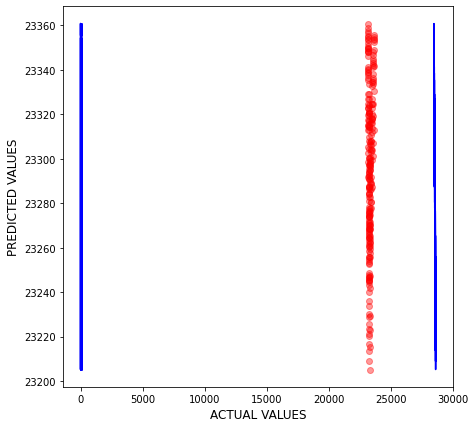

In [99]:
##SCATTER PLOT
plt.figure(figsize=(7,7))
plt.scatter(x=x5,y=predict,color="red",alpha=0.4)
plt.plot(y5,predict["PREDICTED VALUE"],color="blue")
plt.xlabel("ACTUAL VALUES",fontsize=12)
plt.ylabel("PREDICTED VALUES",fontsize=12)
plt.show()

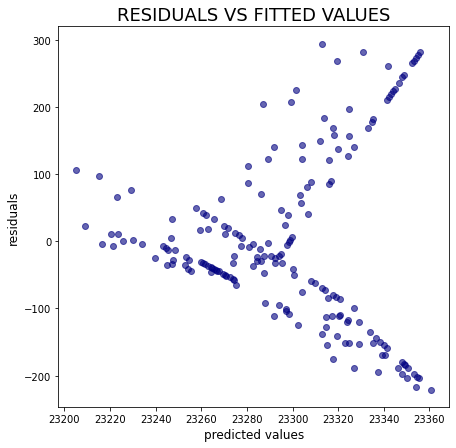

In [100]:
##RESIDUAL VS PREDICTED VALUES
plt.figure(figsize=(7,7))
plt.scatter(x=results5.fittedvalues,y=results5.resid,color="navy",alpha=0.6)
plt.xlabel("predicted values",fontsize=12)
plt.ylabel("residuals",fontsize=12)
plt.title("RESIDUALS VS FITTED VALUES",fontsize=18 )
plt.show()

Text(0.5, 1.0, 'RESIDUAL DISTRIBUTION')

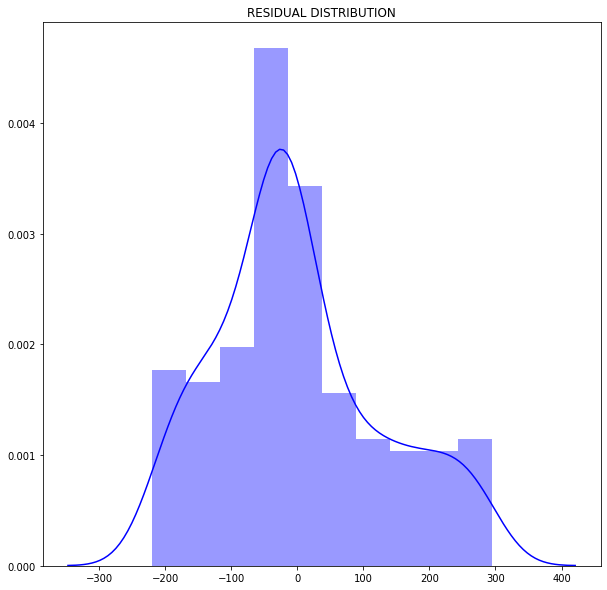

In [101]:
####DISTRIBUTION OF RESIDUALS
residual_mean=round(results5.resid.mean(),3)
residual_skew=round(results5.resid.skew(),3)
plt.figure(figsize=(10,10))
sns.distplot(results5.resid,color="blue")
plt.title("RESIDUAL DISTRIBUTION")

In [102]:
 ####MEAN SQUARED ERROR
results5.mse_resid
results5.rsquared

0.0784744970827641

In [103]:
###PREDICTING AND RANGE
##ROOT MEAN SQUARE ERROR
RMSE5=np.sqrt(results5.mse_resid)

#pd.DataFrame({"R-Squared":[results2.rsquared],"Mean Square Error":[results2.mse_resid],"Root Mean Square":np.sqrt(results2.mse_resid)},index=["value"])

print("one standard deviation:",np.sqrt(results5.mse_resid))

one standard deviation: 127.07473408665814


In [104]:
def predict_price(dataset):
    a=regression5.predict(dataset)
    upper=a+1*RMSE2
    lower=a-1*RMSE2
    predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
    upper=pd.DataFrame.from_records(upper,columns=["UPPER VALUE"])
    lower=pd.DataFrame.from_records(lower,columns=["LOWER VALUE"])
    frames=[predict,upper,lower]
    df=pd.concat(frames,axis=1)
    print(df)
    plt.plot(df)
    plt.legend(loc='best')
    plt.show(block=False)
    return df

No handles with labels found to put in legend.


     PREDICTED VALUE   UPPER VALUE   LOWER VALUE
0       23354.065117  23454.996477  23253.133758
1       23326.924824  23427.856183  23225.993465
2       23360.803930  23461.735289  23259.872571
3       23317.537930  23418.469290  23216.606571
4       23337.636160  23438.567520  23236.704801
5       23358.776111  23459.707470  23257.844752
6       23350.009480  23450.940840  23249.078121
7       23357.426893  23458.358253  23256.495534
8       23356.748293  23457.679652  23255.816934
9       23347.981662  23448.913021  23247.050303
10      23355.399075  23456.330434  23254.467716
11      23354.720474  23455.651833  23253.789115
12      23322.888673  23423.820032  23221.957313
13      23353.371256  23454.302616  23252.439897
14      23346.326593  23447.257952  23245.395234
15      23352.022039  23452.953398  23251.090679
16      23315.237421  23416.168780  23214.306062
17      23350.672821  23451.604180  23249.741462
18      23349.994220  23450.925579  23249.062861
19      23349.315619

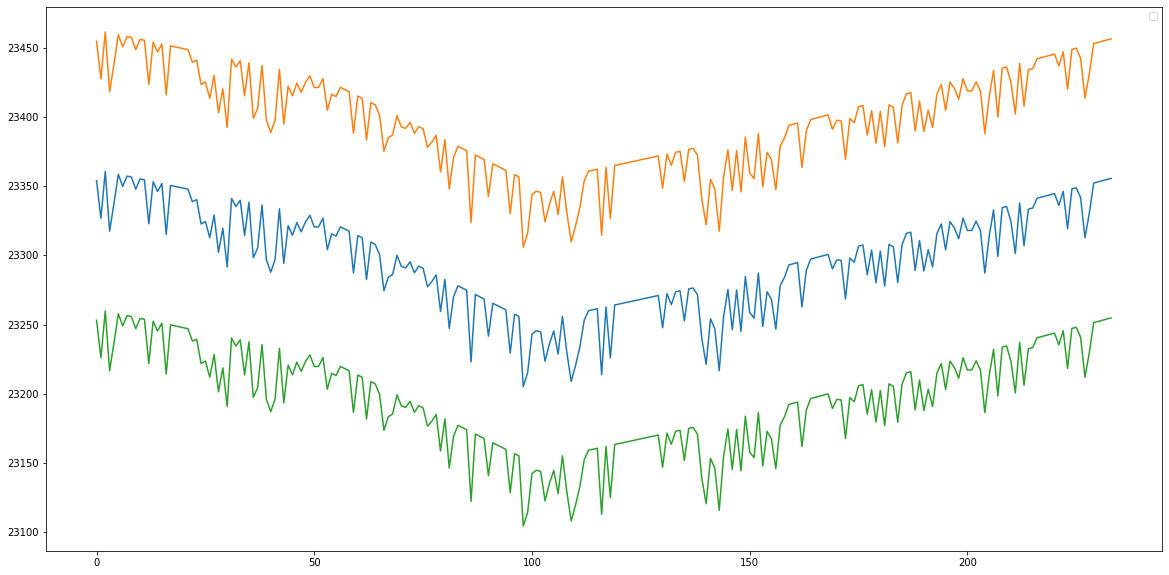

Text(0.5, 1.0, 'Sector(IT)')

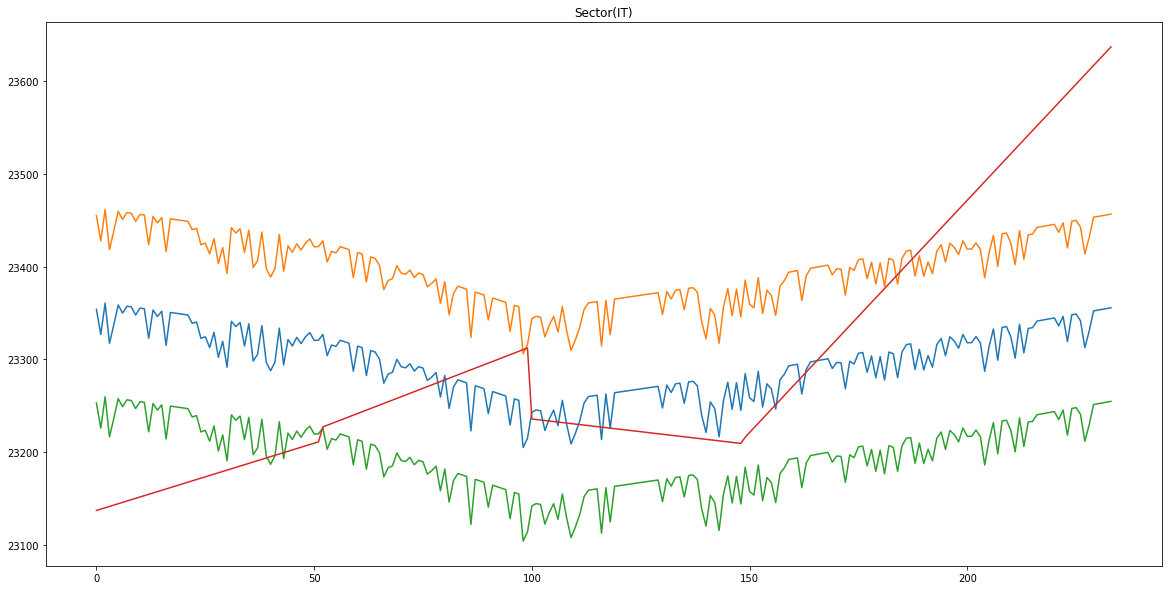

In [105]:
b2=predict_price(y5)

plt.figure(figsize=(20,10))
plt.plot(b2)
plt.plot(x5)
plt.title("Sector(IT)")

# MODEL 6

In [106]:
x6=full_data[['Sector Index(Pharma)']]
y6=full_data.drop(['News_Headlines','Date', 'Sensex 30 stock price','Nifty 50 stock price','SECTOR INDEX(IT)', 'SECTOR INDEX(Banking)',
       'Sector Index(Pharma)','Neutral','Compound'],axis=1)
x_train6,x_test6,y_train6,y_test6=train_test_split(y6,x6,test_size=0.2,random_state=0)

In [107]:
regression6=LinearRegression()
regression6.fit(x_train6,y_train6)
print(pd.DataFrame({"index":x_train6.columns,"coeff":regression6.coef_.tolist()[0]}))
pd.DataFrame(data=regression6.coef_,index=['coefficient'],columns=x_train6.columns)
print("intercept:",regression6.intercept_)
print('R^2 train dataset:',regression6.score(x_train6,y_train6))
print('R^2 test dataset:',regression6.score(x_test6,y_test6))

              index         coeff
0               GDP -5.005300e-16
1         INFLATION -1.819566e-15
2                CC  2.664535e-15
3  UnemploymentRate  0.000000e+00
4  Gold Price 10gms -4.459595e-01
5          Negative  8.805053e+00
6          Positive  5.707089e-01
intercept: [22209.46761832]
R^2 train dataset: 0.2874384471746486
R^2 test dataset: 0.3531931486650205


In [108]:
x_include_constant6=sm.add_constant(x_train6)
model=sm.OLS(y_train6,x_include_constant6)
results6=model.fit()
results6.params
results6.pvalues
print(pd.DataFrame({"Coeffiencients":results6.params,"P-Values":round(results6.pvalues,2)}))
results6.summary()###SUMMARY OF REGRESSION

                  Coeffiencients  P-Values
GDP                    16.849115      0.00
INFLATION               5.826986      0.00
CC                    226.924817      0.00
UnemploymentRate       12.683639      0.00
Gold Price 10gms       -0.445959      0.00
Negative                8.805053      0.54
Positive                0.570709      0.97


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Sector Index(Pharma)   R-squared:                       0.287
Model:                              OLS   Adj. R-squared:                  0.276
Method:                   Least Squares   F-statistic:                     24.61
Date:                  Thu, 29 Apr 2021   Prob (F-statistic):           2.01e-13
Time:                          16:47:49   Log-Likelihood:                -891.12
No. Observations:                   187   AIC:                             1790.
Df Residuals:                       183   BIC:                             1803.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
GDP                 16.8491      1.124     14.994      0.000      14.632      19.066
INFLATION            5.8270      0.389     14.994      0.000       5.060       6.594
CC                 226.9248     15.134     14.994      0.000     197.065     256.785
UnemploymentRate    12.6836      0.846     14.994      0.000      11.015      14.353
Gold Price 10gms    -0.4460      0.052     -8.590      0.000      -0.548      -0.344
Negative             8.8051     14.330      0.614      0.540     -19.467      37.078
Positive             0.5707     14.050      0.041      0.968     -27.150      28.292
==============================================================================
Omnibus:                       14.336   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.803
Skew:                           0.447   Prob(JB):                     1.84e-05
Kurtosis:                       4.414   Cond. No.                     9.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
###VARIANCE INFLATION FACTOR:CHECKING FOR MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF6=[]
for i in range(0, len(x_include_constant6.columns)):
        VIF6.append(variance_inflation_factor(exog=x_include_constant6.values,exog_idx=i))
print(VIF6)
print(pd.DataFrame({"coeffients":x_include_constant6.columns,"VIF":np.around(VIF6,3)}))

[4.4974062952838777e-05, 1.0950265023496443e-05, 0.0, 0.0, 1.0039611519963834, 1.0045720193816816, 1.001145296486527]
         coeffients    VIF
0               GDP  0.000
1         INFLATION  0.000
2                CC  0.000
3  UnemploymentRate  0.000
4  Gold Price 10gms  1.004
5          Negative  1.005
6          Positive  1.001


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [110]:
a=regression6.predict(y6)

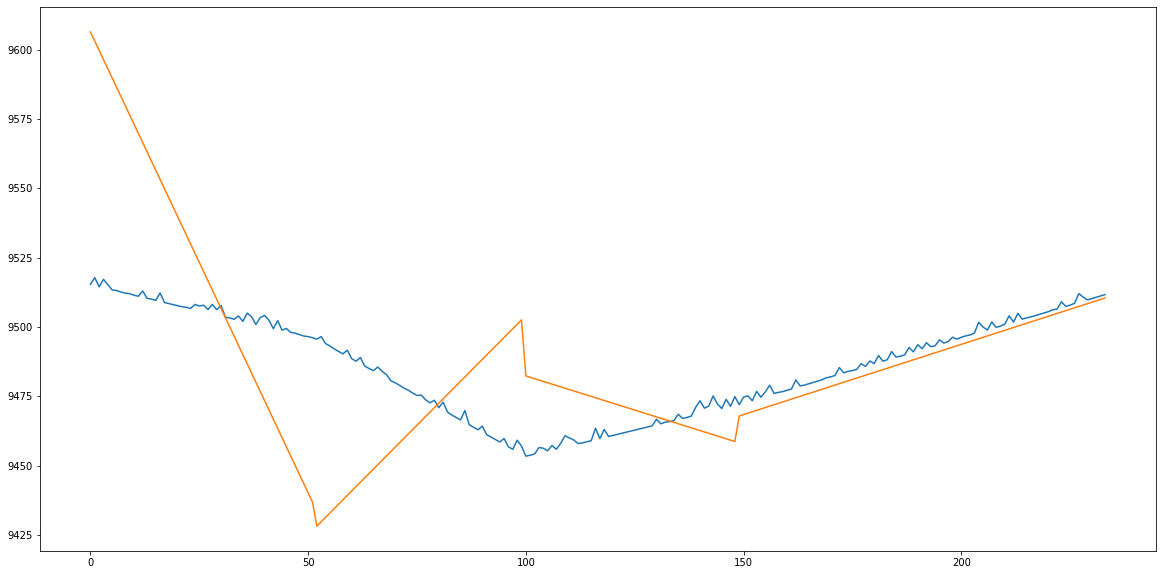

In [111]:
a=regression6.predict(y6)
predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
plt.plot(predict)
plt.plot(x6)

In [112]:
x_include_constant6=sm.add_constant(x_train6)
model6=sm.OLS(y_train6,x_include_constant6)
results6=model6.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


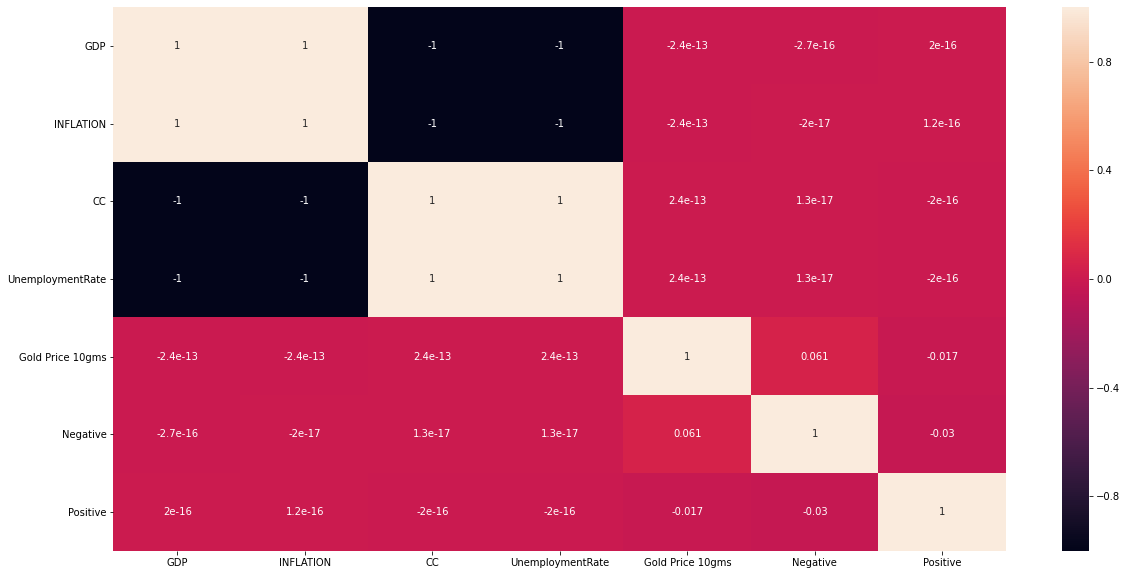

In [113]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = x_include_constant6.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

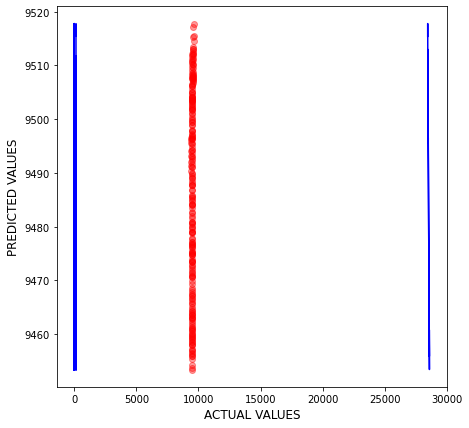

In [114]:
##SCATTER PLOT
plt.figure(figsize=(7,7))
plt.scatter(x=x6,y=predict,color="red",alpha=0.4)
plt.plot(y6,predict["PREDICTED VALUE"],color="blue")
plt.xlabel("ACTUAL VALUES",fontsize=12)
plt.ylabel("PREDICTED VALUES",fontsize=12)
plt.show()

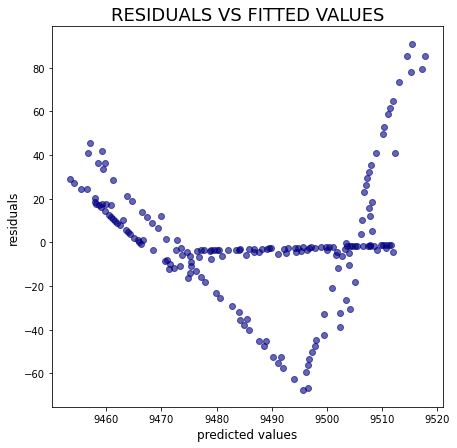

In [115]:
##RESIDUAL VS PREDICTED VALUES
plt.figure(figsize=(7,7))
plt.scatter(x=results6.fittedvalues,y=results6.resid,color="navy",alpha=0.6)
plt.xlabel("predicted values",fontsize=12)
plt.ylabel("residuals",fontsize=12)
plt.title("RESIDUALS VS FITTED VALUES",fontsize=18 )
plt.show()

Text(0.5, 1.0, 'RESIDUAL DISTRIBUTION')

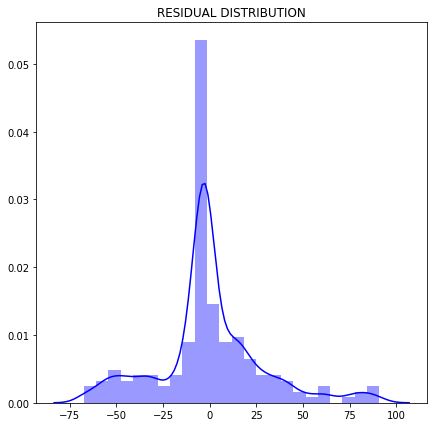

In [135]:
####DISTRIBUTION OF RESIDUALS
residual_mean=round(results6.resid.mean(),3)
residual_skew=round(results6.resid.skew(),3)
plt.figure(figsize=(7,7))
sns.distplot(results6.resid,color="blue")
plt.title("RESIDUAL DISTRIBUTION")

In [117]:
####MEAN SQUARED ERROR
results6.mse_resid
results6.rsquared

0.28743844717464917

In [118]:
###PREDICTING AND RANGE
##ROOT MEAN SQUARE ERROR
RMSE6=np.sqrt(results6.mse_resid)

#pd.DataFrame({"R-Squared":[results2.rsquared],"Mean Square Error":[results2.mse_resid],"Root Mean Square":np.sqrt(results2.mse_resid)},index=["value"])

print("one standard deviation:",np.sqrt(results6.mse_resid))

one standard deviation: 28.708737606664695


In [119]:
def predict_price(dataset):
    a=regression6.predict(dataset)
    upper=a+1*RMSE2
    lower=a-1*RMSE2
    predict=pd.DataFrame.from_records(a,columns=["PREDICTED VALUE"])
    upper=pd.DataFrame.from_records(upper,columns=["UPPER VALUE"])
    lower=pd.DataFrame.from_records(lower,columns=["LOWER VALUE"])
    frames=[predict,upper,lower]
    df=pd.concat(frames,axis=1)
    print(df)
    plt.plot(df)
    plt.legend(loc='best')
    plt.show(block=False)
    return df

No handles with labels found to put in legend.


     PREDICTED VALUE  UPPER VALUE  LOWER VALUE
0        9515.407412  9616.338771  9414.476052
1        9517.783509  9618.714868  9416.852150
2        9514.476820  9615.408179  9413.545461
3        9517.186049  9618.117408  9416.254690
4        9515.246099  9616.177458  9414.314740
5        9513.344083  9614.275442  9412.412724
6        9513.141937  9614.073297  9412.210578
7        9512.590412  9613.521771  9411.659052
8        9512.211346  9613.142705  9411.279987
9        9512.009200  9612.940559  9411.077841
10       9511.457674  9612.389034  9410.526315
11       9511.078609  9612.009968  9410.147250
12       9512.967230  9613.898589  9412.035871
13       9510.324937  9611.256297  9409.393578
14       9510.085125  9611.016484  9409.153766
15       9509.571266  9610.502625  9408.639907
16       9512.256359  9613.187718  9411.324999
17       9508.817594  9609.748953  9407.886235
18       9508.438529  9609.369888  9407.507169
19       9508.059463  9608.990822  9407.128104
20       9507

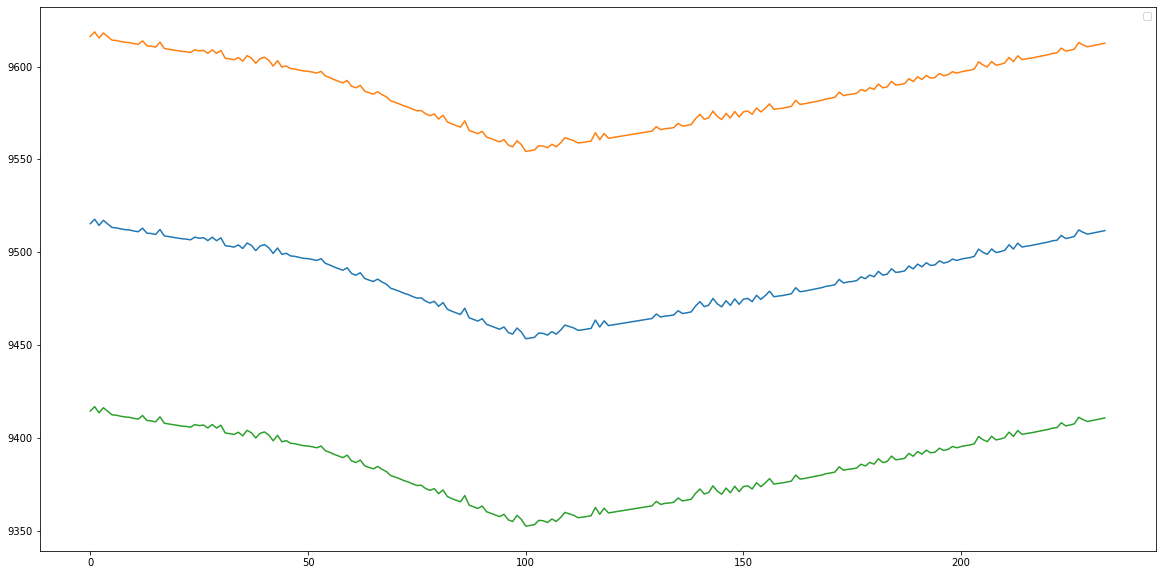

Text(0.5, 1.0, 'Sector(Pharma)')

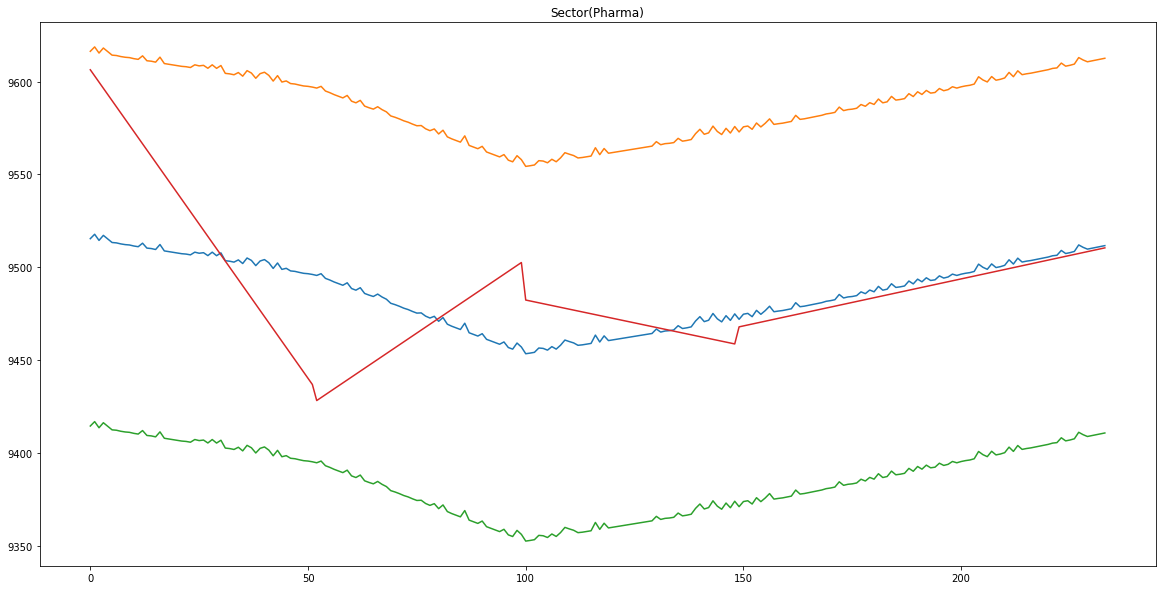

In [120]:
b2=predict_price(y6)

plt.figure(figsize=(20,10))
plt.plot(b2)
plt.plot(x6)
plt.title("Sector(Pharma)")